# DSCI552: HW5
### Alain Tamazian
### ID#: 2073746513

In [1]:
# Cell for all imports necessary for HW4

import statistics
import math
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import hamming_loss as HL
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [2]:
# uncomment one or two of the lines below to adjust max visible columns/rows in the data frames

# pd.set_option("display.max_rows", 10)
# pd.set_option("display.max_columns", 10)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

-----------------

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## 1.(a) 
Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [3]:
mfcc_file = "../data/Anuran_Calls_(MFCCs)/Frogs_MFCCs.csv"

mfcc_total = pd.read_csv(mfcc_file)
display(mfcc_total)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
# Before splitting our data into a train/test set, it's more efficient to consider something from (b)
# From (b) or the "readme" file, we know that: 
# "Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes."
# So, we will need to numerically encode all of these classes -- for the algorithm to better unstand

# mfcc_total["Family"].value_counts()
# mfcc_total["Genus"].value_counts()
# mfcc_total["Species"].value_counts()

# https://pandas.pydata.org/docs/reference/api/pandas.factorize.html
labelsL = ["Family", "Genus", "Species"]
labelsD = {}

for label in labelsL:
    # display(pd.factorize(mfcc_total['Family']))
    classD = {}
    for i, clss in enumerate(pd.factorize(mfcc_total[label])[1]):
        classD[i] = clss
    # replacing th entire label column with its encoded form
    mfcc_total[label] = pd.factorize(mfcc_total[label])[0]
    labelsD[label] = classD

# print(labelsD)
display(mfcc_total)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,0,0,0,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,0,0,0,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,0,0,0,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,0,0,0,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,2,7,9,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,2,7,9,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,2,7,9,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,2,7,9,60


In [5]:
# (pseudo)randomize the dataset -- using the sample() method
mfcc_total = mfcc_total.sample(frac = 1, random_state = 1)

# number of rows (ie total observations)
n = mfcc_total.shape[0]

# divide the entire dataset into seperate training and testing sets
split = round(n*.7)
# since 70% of the dataset isn't a whole number, so we use round()

mfcc_train = mfcc_total[:split].reset_index(drop=True)
mfcc_test = mfcc_total[split:].reset_index(drop=True)

display(mfcc_train)
display(mfcc_test)


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.104201,0.265481,0.551810,0.078270,-0.118555,0.095479,0.082407,-0.064890,0.085840,...,0.043093,0.071320,-0.043916,-0.047089,0.022879,0.034093,2,2,3,27
1,1.0,0.300532,0.259906,0.607010,0.153048,-0.064740,-0.141629,0.078802,0.252198,-0.059811,...,0.218576,-0.028827,-0.122269,-0.097897,0.033834,0.124764,0,0,2,17
2,1.0,0.625136,0.687237,0.583013,-0.137969,-0.079318,0.428873,0.093345,-0.290215,0.115262,...,0.052333,0.127297,-0.029843,0.031279,0.061858,0.020855,0,0,0,8
3,1.0,0.447066,0.398681,0.512818,0.064754,0.001957,-0.033550,0.078006,0.232600,-0.001685,...,0.196299,-0.043328,-0.045204,-0.019360,0.087126,0.160549,0,0,2,19
4,1.0,0.472749,0.665158,0.555585,-0.227115,-0.038111,0.411873,0.001406,-0.360398,0.204005,...,0.043303,0.101327,-0.064806,-0.004610,0.088149,0.035782,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,1.0,0.522009,0.624716,0.509909,-0.187198,-0.026620,0.363353,0.045080,-0.302537,0.113051,...,0.076992,0.058976,-0.084634,0.036025,0.065353,-0.075048,0,0,0,8
5032,1.0,0.409758,0.242245,0.525627,0.150055,0.056364,-0.124587,0.014531,0.260640,0.044032,...,0.208613,0.042511,-0.047308,-0.130803,0.054664,0.186481,0,0,2,23
5033,1.0,0.439177,0.319964,0.496672,0.163065,0.085264,-0.046027,0.048820,0.264964,0.009665,...,0.200008,0.014105,-0.073882,-0.052231,0.094998,0.215197,0,0,2,14
5034,1.0,0.237880,0.151525,0.455237,0.396763,0.309012,0.101054,-0.209149,-0.133798,0.201878,...,-0.170683,-0.161722,-0.129411,-0.087719,-0.023789,-0.014780,0,0,0,1


,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.365486,0.217745,0.413273,0.181854,-0.028258,-0.124050,-0.038158,0.193559,0.252081,...,0.035512,0.137512,0.086895,-0.045385,-0.152506,-0.041091,2,2,3,28
1,1.0,0.199187,0.178924,0.578917,0.197481,-0.009047,-0.155153,0.008910,0.283433,0.087411,...,0.183333,-0.029481,-0.109669,-0.141210,0.012293,0.215596,0,0,2,15
2,1.0,0.129587,0.476989,0.352739,-0.123122,0.227819,0.221854,-0.148600,0.055136,0.135030,...,0.025812,-0.100504,-0.037653,0.154301,0.108622,-0.128287,0,4,6,47
3,1.0,0.220137,0.231039,0.519024,0.067960,-0.025128,-0.041609,0.155323,0.344269,0.092557,...,0.216846,0.022438,-0.132392,-0.101073,0.056708,0.176973,0,0,2,23
4,1.0,0.485256,0.409837,0.197149,0.062965,0.167362,0.033181,-0.042691,0.064624,0.048825,...,0.016741,-0.003787,0.016214,-0.018723,-0.001641,0.062441,2,3,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,0.228594,-0.170298,0.292405,0.426078,0.176247,-0.207625,-0.146072,0.172735,0.255915,...,-0.165995,0.027842,0.114168,0.059058,0.001654,0.004676,1,1,1,11
2155,1.0,0.710417,0.726194,0.425403,-0.033339,0.189222,-0.073790,0.195318,0.221878,-0.270717,...,-0.213310,0.031658,-0.001217,-0.022653,-0.034530,-0.156991,2,3,4,36
2156,1.0,0.401941,0.234870,0.562362,0.182516,-0.020071,-0.198039,0.061250,0.327347,-0.015062,...,0.171359,0.005896,-0.067407,-0.123305,0.086175,0.270507,0,0,2,23
2157,1.0,0.085036,-0.148559,0.364666,0.477381,0.319431,0.017920,-0.283874,-0.232030,0.353031,...,-0.085957,-0.226017,-0.218542,-0.015422,0.290553,0.232004,0,0,0,5


In [6]:
# split train features and labels
mfcc_train_X = mfcc_train.iloc[:, :-4]
mfcc_train_Family = mfcc_train.iloc[:, -4]
mfcc_train_Genus = mfcc_train.iloc[:, -3]
mfcc_train_Species = mfcc_train.iloc[:, -2]

# split test features and labels
mfcc_test_X = mfcc_test.iloc[:, :-4]
mfcc_test_Family = mfcc_test.iloc[:, -4]
mfcc_test_Genus = mfcc_test.iloc[:, -3]
mfcc_test_Species = mfcc_test.iloc[:, -2]

-----------------
## 1.b.i

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

In [7]:
# https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

>Hamming-Loss:<br>In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, i.e., the fraction of the wrong labels to the total number of labels. <br>
>>Hamming Loss = (misclassification)/((# of label per instance)*(total # of instances))

>Exact Match Ratio:<br>It is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.<br>
>>EMR = (# of instances were all labels are accurately classified)/(total # of instances)


In [8]:
# By looking at all of (b), it is clear we will need to repeat many steps (i.e. repeat code)
# So, we create functions for evaluation the hamming loss and exact match

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
# from sklearn.metrics import hamming_loss

def classifier_Eval(title, mfcc_test):
    # hamming loss
    hammingL = []
    for label, prediction in zip(labelsL, predictionsL):
        # compares the ground truth labels with the predicted labels
        hamming = HL(mfcc_test[label], prediction)
        hammingL.append(hamming)
    # The Hamming loss is the fraction of labels that are incorrectly predicted.
    hamming_loss = statistics.mean(hammingL)
    
    # exact match ratio
    # I think sklearn's zero_one_loss() function does this; I just found it after I manually wrote the code
    exact_match = 0
    for i in range(mfcc_test.shape[0]):
        # converting to int() because, "The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()."
        if (int(mfcc_test[labelsL[0]].iloc[i]) == int(predictionsL[0].iloc[i])) \
        and (int(mfcc_test[labelsL[1]].iloc[i]) == int(predictionsL[1].iloc[i])) \
        and (int(mfcc_test[labelsL[2]].iloc[i]) == int(predictionsL[2].iloc[i])):
            exact_match += 1
    exact_match_ratio = exact_match/mfcc_test.shape[0]
    
    print(title)
    print("\tHamming Loss =", hamming_loss)
    print("\tExact Match Ratio =", exact_match_ratio)
    
    evalL.append((hamming_loss, exact_match_ratio))


-----------------
## 1.b.ii

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [9]:
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.
# using raw (i.e. just normalized) attributes
# for "Family" label

# We will use the less computationally expensive method -- suggested in footnote 1
# Using a cross-validation (accuracy) score threshold of ~ >70%, we find the smallest C:gamma combo through manual test; 
# the largest C:gamma combo (i.e. the upper bound of the ranges) has a score of ~99%; 
# We could technically decrease it lower sized combo that still has a high accuracy; but this is fine for this purpose of representing hyperparameter tuning process as we need
# Next we create the range for both parameters and find the best parameter combo (based on the highest train cv_score)
# Per the Footnote and TA's Piazza answer: for C, include powers of 10 for the range increments; 
# for gamma, do increments of 0.1 in between the smallest and largest parameter values.
# As per suggestion, (most of) my parameter ranges were 10 or 20 intervals

# By using the range provided in the footnote as references, and manually testing the cv accuracies,
# I found the roughly largest and smallest C:gamma combos for the different classifiers we test


# The Guassian kernel in sklearn SVM goes by the string "rbf"


In [10]:
# https://www.google.com/amp/s/www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/amp/
# GridsearchCV is a popular algorithm for hyperparameter tuning (with SVC) -- just like we need for C and gamma
# "GridSearchCV is a meta-estimator. It takes an estimator like SVC and creates a new estimator, that behaves exactly the same – in this case, like a classifier."

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# from sklearn.model_selection import GridSearchCV
 
# Since parameter tuning will be done multiple times through (b), it's more convenient to have a function for it

# SVC parameter is the specific SVM classifier being used; e.g. in b.iii its LinearSVC
def parameter_tuning(SVC, param_grid, mfcc_train_X, mfcc_train_Y):
    # can set a higher verbose; you are welcome to adjust it (to 3) if you want to see intermediate CV scores for thousands (or hundreds) of combos of each fold
    grid = GridSearchCV(SVC, param_grid, refit = True, verbose = 1, scoring = "accuracy", cv=10)
    # increase verbose to see the progress: i.e. the accuracy score for each fold for each parameter combination
    # GridSearch's cv uses stratified k fold here 

    # fitting the model for grid search
    grid.fit(mfcc_train_X, mfcc_train_Y)

    # grid.best_params_ is a dictionary with the parameter name as the key, and the best parameter as the value
    if "C" in grid.best_params_:
        best_C = grid.best_params_["C"]
    else:
        best_C = grid.best_params_["classifier__C"]
        # This is for when we are using SMOTE
        
    if "gamma" in grid.best_params_:
        best_gamma = grid.best_params_["gamma"]
        return best_C, best_gamma
    else:
        return best_C



In [11]:
# Without using the GridSearchCV algorithm, we could do the same parameter tuning with the following blow of code
# below is the example for the Family label


# # parameter ranges created (per TA and footnote suggestion); did guess and checking, using threshold of 60% 
# C_set = [10**x for x in range(-3, 7, 1)]
# gamma_set = [x/10 for x in range(1, 21, 1)] 

# combosL = []
# print("The following are the training set 10-fold CV (accuracy) scores for predicting 'Family' classes -- using different parameter combinations.\n")
# for C in C_set:
#     for gamma in gamma_set:
#         # The Guassian kernel in sklearn SVM goes by the string "rbf"
#         svc_model = SVC(kernel="rbf", C=C,  gamma=gamma)
        
#         cv_score = cross_val_score(svc_model, mfcc_train_X, mfcc_train_Family, cv=10, scoring="accuracy").mean()
#         # Since the estimator is a classifier and y is multiclass, StratifiedKFold is used for the cv parameter.
#         print("When C =", C, "and gamma =", str(gamma) +":\n\tCV (accuracy) Score =", cv_score)
#         combosL.append((C, gamma, cv_score))

# # We use the parameter combo with the highest CV accuracy to train our SVC model
# combosL.sort(reverse=True, key=lambda x:x[2])
# best_C = combosL[0][0]
# best_gamma = combosL[0][1]
# print(best_C, best_gamma)


#### "Family" label (Gaussian) SVC classification

In [12]:
# Find the best SVC parameter combination to classify "Family" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking, using threshold of 60% 
C_set = [10**x for x in range(-2, 8, 1)]
gamma_set = [x/10 for x in range(2, 30, 1)] 
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set, "gamma": gamma_set} 


# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C, best_gamma = parameter_tuning(SVC(kernel="rbf"), param_grid, mfcc_train_X, mfcc_train_Family)
print("Best C:", best_C, "\nBest gamma:", best_gamma)


Fitting 10 folds for each of 280 candidates, totalling 2800 fits
[CV 1/10] END ................C=0.01, gamma=0.2;, score=0.714 total time=   1.3s
[CV 2/10] END ................C=0.01, gamma=0.2;, score=0.716 total time=   1.0s
[CV 3/10] END ................C=0.01, gamma=0.2;, score=0.712 total time=   0.8s
[CV 4/10] END ................C=0.01, gamma=0.2;, score=0.730 total time=   0.9s
[CV 5/10] END ................C=0.01, gamma=0.2;, score=0.720 total time=   1.0s
[CV 6/10] END ................C=0.01, gamma=0.2;, score=0.722 total time=   0.8s
[CV 7/10] END ................C=0.01, gamma=0.2;, score=0.753 total time=   0.8s
[CV 8/10] END ................C=0.01, gamma=0.2;, score=0.738 total time=   0.8s
[CV 9/10] END ................C=0.01, gamma=0.2;, score=0.732 total time=   0.8s
[CV 10/10] END ...............C=0.01, gamma=0.2;, score=0.720 total time=   1.3s
[CV 1/10] END ................C=0.01, gamma=0.3;, score=0.821 total time=   1.0s
[CV 2/10] END ................C=0.01, gamma=

[CV 2/10] END ................C=0.01, gamma=1.2;, score=0.849 total time=   0.6s
[CV 3/10] END ................C=0.01, gamma=1.2;, score=0.879 total time=   0.6s
[CV 4/10] END ................C=0.01, gamma=1.2;, score=0.881 total time=   0.6s
[CV 5/10] END ................C=0.01, gamma=1.2;, score=0.875 total time=   0.6s
[CV 6/10] END ................C=0.01, gamma=1.2;, score=0.867 total time=   0.6s
[CV 7/10] END ................C=0.01, gamma=1.2;, score=0.877 total time=   0.6s
[CV 8/10] END ................C=0.01, gamma=1.2;, score=0.853 total time=   0.6s
[CV 9/10] END ................C=0.01, gamma=1.2;, score=0.853 total time=   0.6s
[CV 10/10] END ...............C=0.01, gamma=1.2;, score=0.859 total time=   0.6s
[CV 1/10] END ................C=0.01, gamma=1.3;, score=0.877 total time=   0.6s
[CV 2/10] END ................C=0.01, gamma=1.3;, score=0.855 total time=   0.6s
[CV 3/10] END ................C=0.01, gamma=1.3;, score=0.879 total time=   0.6s
[CV 4/10] END ..............

[CV 4/10] END ................C=0.01, gamma=2.2;, score=0.885 total time=   0.5s
[CV 5/10] END ................C=0.01, gamma=2.2;, score=0.877 total time=   0.5s
[CV 6/10] END ................C=0.01, gamma=2.2;, score=0.869 total time=   0.5s
[CV 7/10] END ................C=0.01, gamma=2.2;, score=0.881 total time=   0.5s
[CV 8/10] END ................C=0.01, gamma=2.2;, score=0.871 total time=   0.5s
[CV 9/10] END ................C=0.01, gamma=2.2;, score=0.857 total time=   0.5s
[CV 10/10] END ...............C=0.01, gamma=2.2;, score=0.863 total time=   0.5s
[CV 1/10] END ................C=0.01, gamma=2.3;, score=0.867 total time=   0.5s
[CV 2/10] END ................C=0.01, gamma=2.3;, score=0.857 total time=   0.5s
[CV 3/10] END ................C=0.01, gamma=2.3;, score=0.877 total time=   0.5s
[CV 4/10] END ................C=0.01, gamma=2.3;, score=0.885 total time=   0.5s
[CV 5/10] END ................C=0.01, gamma=2.3;, score=0.875 total time=   0.5s
[CV 6/10] END ..............

[CV 6/10] END .................C=0.1, gamma=0.4;, score=0.950 total time=   0.4s
[CV 7/10] END .................C=0.1, gamma=0.4;, score=0.954 total time=   0.4s
[CV 8/10] END .................C=0.1, gamma=0.4;, score=0.926 total time=   0.4s
[CV 9/10] END .................C=0.1, gamma=0.4;, score=0.938 total time=   0.4s
[CV 10/10] END ................C=0.1, gamma=0.4;, score=0.938 total time=   0.4s
[CV 1/10] END .................C=0.1, gamma=0.5;, score=0.944 total time=   0.3s
[CV 2/10] END .................C=0.1, gamma=0.5;, score=0.938 total time=   0.3s
[CV 3/10] END .................C=0.1, gamma=0.5;, score=0.960 total time=   0.4s
[CV 4/10] END .................C=0.1, gamma=0.5;, score=0.954 total time=   0.4s
[CV 5/10] END .................C=0.1, gamma=0.5;, score=0.954 total time=   0.3s
[CV 6/10] END .................C=0.1, gamma=0.5;, score=0.954 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=0.5;, score=0.954 total time=   0.3s
[CV 8/10] END ..............

[CV 8/10] END .................C=0.1, gamma=1.4;, score=0.960 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=1.4;, score=0.962 total time=   0.3s
[CV 10/10] END ................C=0.1, gamma=1.4;, score=0.956 total time=   0.3s
[CV 1/10] END .................C=0.1, gamma=1.5;, score=0.964 total time=   0.3s
[CV 2/10] END .................C=0.1, gamma=1.5;, score=0.964 total time=   0.3s
[CV 3/10] END .................C=0.1, gamma=1.5;, score=0.976 total time=   0.3s
[CV 4/10] END .................C=0.1, gamma=1.5;, score=0.964 total time=   0.3s
[CV 5/10] END .................C=0.1, gamma=1.5;, score=0.966 total time=   0.3s
[CV 6/10] END .................C=0.1, gamma=1.5;, score=0.964 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=1.5;, score=0.972 total time=   0.3s
[CV 8/10] END .................C=0.1, gamma=1.5;, score=0.962 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=1.5;, score=0.964 total time=   0.2s
[CV 10/10] END .............

[CV 10/10] END ................C=0.1, gamma=2.4;, score=0.962 total time=   0.2s
[CV 1/10] END .................C=0.1, gamma=2.5;, score=0.968 total time=   0.2s
[CV 2/10] END .................C=0.1, gamma=2.5;, score=0.966 total time=   0.2s
[CV 3/10] END .................C=0.1, gamma=2.5;, score=0.974 total time=   0.2s
[CV 4/10] END .................C=0.1, gamma=2.5;, score=0.976 total time=   0.2s
[CV 5/10] END .................C=0.1, gamma=2.5;, score=0.968 total time=   0.2s
[CV 6/10] END .................C=0.1, gamma=2.5;, score=0.974 total time=   0.2s
[CV 7/10] END .................C=0.1, gamma=2.5;, score=0.976 total time=   0.2s
[CV 8/10] END .................C=0.1, gamma=2.5;, score=0.972 total time=   0.2s
[CV 9/10] END .................C=0.1, gamma=2.5;, score=0.970 total time=   0.2s
[CV 10/10] END ................C=0.1, gamma=2.5;, score=0.964 total time=   0.3s
[CV 1/10] END .................C=0.1, gamma=2.6;, score=0.968 total time=   0.3s
[CV 2/10] END ..............

[CV 3/10] END ...................C=1, gamma=0.7;, score=0.980 total time=   0.2s
[CV 4/10] END ...................C=1, gamma=0.7;, score=0.990 total time=   0.2s
[CV 5/10] END ...................C=1, gamma=0.7;, score=0.978 total time=   0.2s
[CV 6/10] END ...................C=1, gamma=0.7;, score=0.984 total time=   0.2s
[CV 7/10] END ...................C=1, gamma=0.7;, score=0.982 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=0.7;, score=0.990 total time=   0.1s
[CV 9/10] END ...................C=1, gamma=0.7;, score=0.990 total time=   0.2s
[CV 10/10] END ..................C=1, gamma=0.7;, score=0.980 total time=   0.2s
[CV 1/10] END ...................C=1, gamma=0.8;, score=0.982 total time=   0.1s
[CV 2/10] END ...................C=1, gamma=0.8;, score=0.976 total time=   0.1s
[CV 3/10] END ...................C=1, gamma=0.8;, score=0.982 total time=   0.1s
[CV 4/10] END ...................C=1, gamma=0.8;, score=0.992 total time=   0.1s
[CV 5/10] END ..............

[CV 5/10] END ...................C=1, gamma=1.7;, score=0.990 total time=   0.1s
[CV 6/10] END ...................C=1, gamma=1.7;, score=0.990 total time=   0.1s
[CV 7/10] END ...................C=1, gamma=1.7;, score=0.988 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=1.7;, score=0.994 total time=   0.1s
[CV 9/10] END ...................C=1, gamma=1.7;, score=0.992 total time=   0.1s
[CV 10/10] END ..................C=1, gamma=1.7;, score=0.992 total time=   0.1s
[CV 1/10] END ...................C=1, gamma=1.8;, score=0.990 total time=   0.1s
[CV 2/10] END ...................C=1, gamma=1.8;, score=0.986 total time=   0.1s
[CV 3/10] END ...................C=1, gamma=1.8;, score=0.984 total time=   0.1s
[CV 4/10] END ...................C=1, gamma=1.8;, score=0.994 total time=   0.1s
[CV 5/10] END ...................C=1, gamma=1.8;, score=0.988 total time=   0.1s
[CV 6/10] END ...................C=1, gamma=1.8;, score=0.990 total time=   0.1s
[CV 7/10] END ..............

[CV 7/10] END ...................C=1, gamma=2.7;, score=0.988 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=2.7;, score=0.992 total time=   0.1s
[CV 9/10] END ...................C=1, gamma=2.7;, score=0.992 total time=   0.1s
[CV 10/10] END ..................C=1, gamma=2.7;, score=0.992 total time=   0.1s
[CV 1/10] END ...................C=1, gamma=2.8;, score=0.990 total time=   0.1s
[CV 2/10] END ...................C=1, gamma=2.8;, score=0.990 total time=   0.1s
[CV 3/10] END ...................C=1, gamma=2.8;, score=0.984 total time=   0.1s
[CV 4/10] END ...................C=1, gamma=2.8;, score=0.996 total time=   0.1s
[CV 5/10] END ...................C=1, gamma=2.8;, score=0.996 total time=   0.1s
[CV 6/10] END ...................C=1, gamma=2.8;, score=0.992 total time=   0.1s
[CV 7/10] END ...................C=1, gamma=2.8;, score=0.988 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=2.8;, score=0.990 total time=   0.1s
[CV 9/10] END ..............

[CV 1/10] END ..................C=10, gamma=1.0;, score=0.990 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=1.0;, score=0.988 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=1.0;, score=0.984 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=1.0;, score=0.996 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=1.0;, score=0.996 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=1.0;, score=0.990 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=1.0;, score=0.986 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=1.0;, score=0.994 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=1.0;, score=0.990 total time=   0.1s
[CV 10/10] END .................C=10, gamma=1.0;, score=0.992 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=1.1;, score=0.990 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=1.1;, score=0.988 total time=   0.1s
[CV 3/10] END ..............

[CV 5/10] END ..................C=10, gamma=2.0;, score=0.998 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=2.0;, score=0.992 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=2.0;, score=0.988 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=2.0;, score=0.996 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=2.0;, score=0.990 total time=   0.1s
[CV 10/10] END .................C=10, gamma=2.0;, score=0.994 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=2.1;, score=0.992 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=2.1;, score=0.990 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=2.1;, score=0.986 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=2.1;, score=0.998 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=2.1;, score=0.998 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=2.1;, score=0.992 total time=   0.1s
[CV 7/10] END ..............

[CV 7/10] END .................C=100, gamma=0.2;, score=0.986 total time=   0.1s
[CV 8/10] END .................C=100, gamma=0.2;, score=0.990 total time=   0.1s
[CV 9/10] END .................C=100, gamma=0.2;, score=0.988 total time=   0.1s
[CV 10/10] END ................C=100, gamma=0.2;, score=0.990 total time=   0.1s
[CV 1/10] END .................C=100, gamma=0.3;, score=0.988 total time=   0.1s
[CV 2/10] END .................C=100, gamma=0.3;, score=0.984 total time=   0.1s
[CV 3/10] END .................C=100, gamma=0.3;, score=0.980 total time=   0.1s
[CV 4/10] END .................C=100, gamma=0.3;, score=0.998 total time=   0.1s
[CV 5/10] END .................C=100, gamma=0.3;, score=0.996 total time=   0.1s
[CV 6/10] END .................C=100, gamma=0.3;, score=0.988 total time=   0.1s
[CV 7/10] END .................C=100, gamma=0.3;, score=0.986 total time=   0.1s
[CV 8/10] END .................C=100, gamma=0.3;, score=0.984 total time=   0.1s
[CV 9/10] END ..............

[CV 10/10] END ................C=100, gamma=1.2;, score=0.994 total time=   0.1s
[CV 1/10] END .................C=100, gamma=1.3;, score=0.994 total time=   0.1s
[CV 2/10] END .................C=100, gamma=1.3;, score=0.990 total time=   0.1s
[CV 3/10] END .................C=100, gamma=1.3;, score=0.988 total time=   0.1s
[CV 4/10] END .................C=100, gamma=1.3;, score=0.998 total time=   0.1s
[CV 5/10] END .................C=100, gamma=1.3;, score=0.996 total time=   0.1s
[CV 6/10] END .................C=100, gamma=1.3;, score=0.992 total time=   0.1s
[CV 7/10] END .................C=100, gamma=1.3;, score=0.988 total time=   0.1s
[CV 8/10] END .................C=100, gamma=1.3;, score=0.994 total time=   0.1s
[CV 9/10] END .................C=100, gamma=1.3;, score=0.990 total time=   0.1s
[CV 10/10] END ................C=100, gamma=1.3;, score=0.994 total time=   0.1s
[CV 1/10] END .................C=100, gamma=1.4;, score=0.994 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END .................C=100, gamma=2.3;, score=0.992 total time=   0.1s
[CV 3/10] END .................C=100, gamma=2.3;, score=0.988 total time=   0.1s
[CV 4/10] END .................C=100, gamma=2.3;, score=0.998 total time=   0.1s
[CV 5/10] END .................C=100, gamma=2.3;, score=0.998 total time=   0.1s
[CV 6/10] END .................C=100, gamma=2.3;, score=0.992 total time=   0.1s
[CV 7/10] END .................C=100, gamma=2.3;, score=0.988 total time=   0.1s
[CV 8/10] END .................C=100, gamma=2.3;, score=0.996 total time=   0.1s
[CV 9/10] END .................C=100, gamma=2.3;, score=0.990 total time=   0.1s
[CV 10/10] END ................C=100, gamma=2.3;, score=0.994 total time=   0.1s
[CV 1/10] END .................C=100, gamma=2.4;, score=0.992 total time=   0.1s
[CV 2/10] END .................C=100, gamma=2.4;, score=0.992 total time=   0.1s
[CV 3/10] END .................C=100, gamma=2.4;, score=0.988 total time=   0.1s
[CV 4/10] END ..............

[CV 5/10] END ................C=1000, gamma=0.5;, score=0.992 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=0.5;, score=0.986 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=0.5;, score=0.988 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=0.5;, score=0.996 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=0.5;, score=0.992 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=0.5;, score=0.990 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=0.6;, score=0.992 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=0.6;, score=0.988 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=0.6;, score=0.984 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=0.6;, score=1.000 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=0.6;, score=0.994 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 7/10] END ..............

[CV 7/10] END ................C=1000, gamma=1.5;, score=0.988 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=1.5;, score=0.994 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=1.5;, score=0.990 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=1.5;, score=0.994 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=1.6;, score=0.990 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=1.6;, score=0.998 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=1.6;, score=0.996 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=1.6;, score=0.992 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 9/10] END ..............

[CV 10/10] END ...............C=1000, gamma=2.5;, score=0.994 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=2.6;, score=0.992 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=2.6;, score=0.994 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=2.6;, score=0.988 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=2.6;, score=0.998 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=2.6;, score=0.998 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=2.6;, score=0.992 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=2.6;, score=0.988 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=2.6;, score=0.996 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=2.6;, score=0.988 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=2.6;, score=0.994 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=2.7;, score=0.992 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END ...............C=10000, gamma=0.8;, score=0.988 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=0.8;, score=0.984 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=0.8;, score=1.000 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=0.8;, score=0.996 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=0.8;, score=0.986 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=0.8;, score=0.988 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=0.8;, score=0.992 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=0.8;, score=0.990 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=0.9;, score=0.994 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=0.9;, score=0.988 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=0.9;, score=0.988 total time=   0.1s
[CV 4/10] END ..............

[CV 4/10] END ...............C=10000, gamma=1.8;, score=0.998 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=1.8;, score=0.996 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=1.8;, score=0.992 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=1.8;, score=0.988 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=1.8;, score=0.996 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=1.8;, score=0.988 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=1.8;, score=0.994 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=1.9;, score=0.992 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=1.9;, score=0.992 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=1.9;, score=0.988 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=1.9;, score=0.998 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=1.9;, score=0.996 total time=   0.1s
[CV 6/10] END ..............

[CV 6/10] END ...............C=10000, gamma=2.8;, score=0.992 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=2.8;, score=0.988 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=2.8;, score=0.994 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=2.8;, score=0.988 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=2.8;, score=0.994 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=2.9;, score=0.994 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=2.9;, score=0.992 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=2.9;, score=0.988 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=2.9;, score=0.996 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=2.9;, score=0.998 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=2.9;, score=0.992 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=2.9;, score=0.988 total time=   0.1s
[CV 8/10] END ..............

[CV 10/10] END .............C=100000, gamma=1.0;, score=0.992 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=1.1;, score=0.994 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=1.1;, score=0.990 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=1.1;, score=0.988 total time=   0.1s
[CV 4/10] END ..............C=100000, gamma=1.1;, score=0.998 total time=   0.1s
[CV 5/10] END ..............C=100000, gamma=1.1;, score=0.996 total time=   0.1s
[CV 6/10] END ..............C=100000, gamma=1.1;, score=0.988 total time=   0.1s
[CV 7/10] END ..............C=100000, gamma=1.1;, score=0.988 total time=   0.1s
[CV 8/10] END ..............C=100000, gamma=1.1;, score=0.996 total time=   0.1s
[CV 9/10] END ..............C=100000, gamma=1.1;, score=0.990 total time=   0.1s
[CV 10/10] END .............C=100000, gamma=1.1;, score=0.994 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=1.2;, score=0.994 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END ..............C=100000, gamma=2.1;, score=0.992 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=2.1;, score=0.988 total time=   0.1s
[CV 4/10] END ..............C=100000, gamma=2.1;, score=0.998 total time=   0.1s
[CV 5/10] END ..............C=100000, gamma=2.1;, score=0.998 total time=   0.1s
[CV 6/10] END ..............C=100000, gamma=2.1;, score=0.992 total time=   0.1s
[CV 7/10] END ..............C=100000, gamma=2.1;, score=0.988 total time=   0.1s
[CV 8/10] END ..............C=100000, gamma=2.1;, score=0.996 total time=   0.1s
[CV 9/10] END ..............C=100000, gamma=2.1;, score=0.990 total time=   0.1s
[CV 10/10] END .............C=100000, gamma=2.1;, score=0.994 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=2.2;, score=0.992 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=2.2;, score=0.992 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=2.2;, score=0.988 total time=   0.1s
[CV 4/10] END ..............

[CV 5/10] END .............C=1000000, gamma=0.3;, score=0.992 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=0.3;, score=0.984 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=0.3;, score=0.984 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=0.3;, score=0.990 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=0.3;, score=0.990 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=0.3;, score=0.986 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=0.4;, score=0.992 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=0.4;, score=0.988 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=0.4;, score=0.986 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=0.4;, score=1.000 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=0.4;, score=0.992 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=0.4;, score=0.986 total time=   0.1s
[CV 7/10] END .............C

[CV 8/10] END .............C=1000000, gamma=1.3;, score=0.994 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=1.3;, score=0.990 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=1.3;, score=0.994 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=1.4;, score=0.994 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=1.4;, score=0.990 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=1.4;, score=0.988 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=1.4;, score=0.998 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=1.4;, score=0.996 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=1.4;, score=0.990 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=1.4;, score=0.988 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=1.4;, score=0.994 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=1.4;, score=0.990 total time=   0.1s
[CV 10/10] END ............C

[CV 1/10] END .............C=1000000, gamma=2.4;, score=0.992 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=2.4;, score=0.992 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=2.4;, score=0.988 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=2.4;, score=0.998 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=2.4;, score=0.998 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=2.4;, score=0.992 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=2.4;, score=0.988 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=2.4;, score=0.996 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=2.4;, score=0.988 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=2.4;, score=0.994 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=2.5;, score=0.992 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=2.5;, score=0.992 total time=   0.1s
[CV 3/10] END .............C

[CV 5/10] END ............C=10000000, gamma=0.6;, score=0.994 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=0.6;, score=0.988 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=0.6;, score=0.996 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=0.7;, score=0.988 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=0.7;, score=0.984 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=0.7;, score=1.000 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=0.7;, score=0.996 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=0.7;, score=0.986 total time=   0.1s
[CV 7/10] END ............C=

[CV 7/10] END ............C=10000000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=1.7;, score=0.994 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=1.7;, score=0.992 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=1.7;, score=0.988 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=1.7;, score=0.998 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=1.7;, score=0.996 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=1.7;, score=0.992 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=1.7;, score=0.988 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=1.7;, score=0.996 total time=   0.1s
[CV 9/10] END ............C=

[CV 9/10] END ............C=10000000, gamma=2.6;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=2.6;, score=0.994 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=2.7;, score=0.992 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=2.7;, score=0.994 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=2.7;, score=0.988 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=2.7;, score=0.998 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=2.7;, score=0.998 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=2.7;, score=0.992 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=2.7;, score=0.988 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=2.7;, score=0.996 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=2.7;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=2.7;, score=0.994 total time=   0.1s
[CV 1/10] END ............C=

In [13]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Family label
svc_model = SVC(kernel="rbf", C=best_C,  gamma=best_gamma)
# Using the weight of the SVM penalty (C) and the width of the Gaussian Kernel (gamma) determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X, mfcc_train_Family)

# create a list for predictions of all 3 labels to use for hamming loss and exact match calculation
predictionsL = []

# Make (class) predictions
prediction_Family = svc_model.predict(mfcc_test_X)

predictionsL.append(pd.DataFrame(prediction_Family))


#### "Genus" label (Gaussian) SVC classification

In [14]:
# Find the best SVC parameter combination to classify "Genus" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking, using threshold of 60% 
C_set = [10**x for x in range(-2, 8, 1)]
gamma_set = [x/10 for x in range(3, 25, 1)] 
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set, "gamma": gamma_set} 


# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C, best_gamma = parameter_tuning(SVC(kernel="rbf"), param_grid, mfcc_train_X, mfcc_train_Genus)
print("Best C:", best_C, "\nBest gamma:", best_gamma)


Fitting 10 folds for each of 220 candidates, totalling 2200 fits
[CV 1/10] END ................C=0.01, gamma=0.3;, score=0.712 total time=   0.8s
[CV 2/10] END ................C=0.01, gamma=0.3;, score=0.726 total time=   0.8s
[CV 3/10] END ................C=0.01, gamma=0.3;, score=0.718 total time=   0.8s
[CV 4/10] END ................C=0.01, gamma=0.3;, score=0.724 total time=   0.7s
[CV 5/10] END ................C=0.01, gamma=0.3;, score=0.728 total time=   0.8s
[CV 6/10] END ................C=0.01, gamma=0.3;, score=0.712 total time=   0.8s
[CV 7/10] END ................C=0.01, gamma=0.3;, score=0.746 total time=   0.7s
[CV 8/10] END ................C=0.01, gamma=0.3;, score=0.728 total time=   0.8s
[CV 9/10] END ................C=0.01, gamma=0.3;, score=0.702 total time=   0.8s
[CV 10/10] END ...............C=0.01, gamma=0.3;, score=0.732 total time=   0.7s
[CV 1/10] END ................C=0.01, gamma=0.4;, score=0.778 total time=   0.7s
[CV 2/10] END ................C=0.01, gamma=

[CV 2/10] END ................C=0.01, gamma=1.3;, score=0.794 total time=   0.6s
[CV 3/10] END ................C=0.01, gamma=1.3;, score=0.794 total time=   0.6s
[CV 4/10] END ................C=0.01, gamma=1.3;, score=0.790 total time=   0.6s
[CV 5/10] END ................C=0.01, gamma=1.3;, score=0.792 total time=   0.7s
[CV 6/10] END ................C=0.01, gamma=1.3;, score=0.790 total time=   0.7s
[CV 7/10] END ................C=0.01, gamma=1.3;, score=0.795 total time=   0.6s
[CV 8/10] END ................C=0.01, gamma=1.3;, score=0.791 total time=   0.6s
[CV 9/10] END ................C=0.01, gamma=1.3;, score=0.785 total time=   0.6s
[CV 10/10] END ...............C=0.01, gamma=1.3;, score=0.795 total time=   0.6s
[CV 1/10] END ................C=0.01, gamma=1.4;, score=0.794 total time=   0.6s
[CV 2/10] END ................C=0.01, gamma=1.4;, score=0.796 total time=   0.6s
[CV 3/10] END ................C=0.01, gamma=1.4;, score=0.798 total time=   0.6s
[CV 4/10] END ..............

[CV 4/10] END ................C=0.01, gamma=2.3;, score=0.792 total time=   0.6s
[CV 5/10] END ................C=0.01, gamma=2.3;, score=0.810 total time=   0.6s
[CV 6/10] END ................C=0.01, gamma=2.3;, score=0.806 total time=   0.6s
[CV 7/10] END ................C=0.01, gamma=2.3;, score=0.805 total time=   0.6s
[CV 8/10] END ................C=0.01, gamma=2.3;, score=0.817 total time=   0.6s
[CV 9/10] END ................C=0.01, gamma=2.3;, score=0.793 total time=   0.6s
[CV 10/10] END ...............C=0.01, gamma=2.3;, score=0.801 total time=   0.8s
[CV 1/10] END ................C=0.01, gamma=2.4;, score=0.802 total time=   0.7s
[CV 2/10] END ................C=0.01, gamma=2.4;, score=0.815 total time=   0.6s
[CV 3/10] END ................C=0.01, gamma=2.4;, score=0.813 total time=   0.6s
[CV 4/10] END ................C=0.01, gamma=2.4;, score=0.792 total time=   0.6s
[CV 5/10] END ................C=0.01, gamma=2.4;, score=0.810 total time=   0.7s
[CV 6/10] END ..............

[CV 6/10] END .................C=0.1, gamma=1.1;, score=0.940 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=1.1;, score=0.934 total time=   0.3s
[CV 8/10] END .................C=0.1, gamma=1.1;, score=0.930 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=1.1;, score=0.932 total time=   0.3s
[CV 10/10] END ................C=0.1, gamma=1.1;, score=0.942 total time=   0.3s
[CV 1/10] END .................C=0.1, gamma=1.2;, score=0.935 total time=   0.3s
[CV 2/10] END .................C=0.1, gamma=1.2;, score=0.933 total time=   0.3s
[CV 3/10] END .................C=0.1, gamma=1.2;, score=0.942 total time=   0.3s
[CV 4/10] END .................C=0.1, gamma=1.2;, score=0.937 total time=   0.3s
[CV 5/10] END .................C=0.1, gamma=1.2;, score=0.935 total time=   0.3s
[CV 6/10] END .................C=0.1, gamma=1.2;, score=0.942 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=1.2;, score=0.936 total time=   0.3s
[CV 8/10] END ..............

[CV 8/10] END .................C=0.1, gamma=2.1;, score=0.948 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=2.1;, score=0.952 total time=   0.3s
[CV 10/10] END ................C=0.1, gamma=2.1;, score=0.960 total time=   0.3s
[CV 1/10] END .................C=0.1, gamma=2.2;, score=0.950 total time=   0.3s
[CV 2/10] END .................C=0.1, gamma=2.2;, score=0.952 total time=   0.3s
[CV 3/10] END .................C=0.1, gamma=2.2;, score=0.948 total time=   0.3s
[CV 4/10] END .................C=0.1, gamma=2.2;, score=0.954 total time=   0.3s
[CV 5/10] END .................C=0.1, gamma=2.2;, score=0.942 total time=   0.3s
[CV 6/10] END .................C=0.1, gamma=2.2;, score=0.958 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=2.2;, score=0.952 total time=   0.3s
[CV 8/10] END .................C=0.1, gamma=2.2;, score=0.954 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=2.2;, score=0.952 total time=   0.3s
[CV 10/10] END .............

[CV 10/10] END ..................C=1, gamma=0.9;, score=0.984 total time=   0.2s
[CV 1/10] END ...................C=1, gamma=1.0;, score=0.982 total time=   0.2s
[CV 2/10] END ...................C=1, gamma=1.0;, score=0.992 total time=   0.2s
[CV 3/10] END ...................C=1, gamma=1.0;, score=0.982 total time=   0.2s
[CV 4/10] END ...................C=1, gamma=1.0;, score=0.984 total time=   0.2s
[CV 5/10] END ...................C=1, gamma=1.0;, score=0.978 total time=   0.2s
[CV 6/10] END ...................C=1, gamma=1.0;, score=0.986 total time=   0.2s
[CV 7/10] END ...................C=1, gamma=1.0;, score=0.984 total time=   0.2s
[CV 8/10] END ...................C=1, gamma=1.0;, score=0.988 total time=   0.2s
[CV 9/10] END ...................C=1, gamma=1.0;, score=0.990 total time=   0.2s
[CV 10/10] END ..................C=1, gamma=1.0;, score=0.986 total time=   0.2s
[CV 1/10] END ...................C=1, gamma=1.1;, score=0.986 total time=   0.2s
[CV 2/10] END ..............

[CV 2/10] END ...................C=1, gamma=2.0;, score=0.994 total time=   0.2s
[CV 3/10] END ...................C=1, gamma=2.0;, score=0.984 total time=   0.2s
[CV 4/10] END ...................C=1, gamma=2.0;, score=0.986 total time=   0.2s
[CV 5/10] END ...................C=1, gamma=2.0;, score=0.984 total time=   0.2s
[CV 6/10] END ...................C=1, gamma=2.0;, score=0.986 total time=   0.2s
[CV 7/10] END ...................C=1, gamma=2.0;, score=0.986 total time=   0.2s
[CV 8/10] END ...................C=1, gamma=2.0;, score=0.996 total time=   0.2s
[CV 9/10] END ...................C=1, gamma=2.0;, score=0.986 total time=   0.2s
[CV 10/10] END ..................C=1, gamma=2.0;, score=0.988 total time=   0.2s
[CV 1/10] END ...................C=1, gamma=2.1;, score=0.988 total time=   0.2s
[CV 2/10] END ...................C=1, gamma=2.1;, score=0.994 total time=   0.2s
[CV 3/10] END ...................C=1, gamma=2.1;, score=0.984 total time=   0.2s
[CV 4/10] END ..............

[CV 4/10] END ..................C=10, gamma=0.8;, score=0.990 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=0.8;, score=0.996 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=0.8;, score=0.980 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=0.8;, score=0.988 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=0.8;, score=0.996 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=0.8;, score=0.990 total time=   0.1s
[CV 10/10] END .................C=10, gamma=0.8;, score=0.992 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=0.9;, score=0.986 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=0.9;, score=0.994 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=0.9;, score=0.982 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=0.9;, score=0.990 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=0.9;, score=0.992 total time=   0.1s
[CV 6/10] END ..............

[CV 6/10] END ..................C=10, gamma=1.8;, score=0.980 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=1.8;, score=0.992 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=1.8;, score=0.998 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=1.8;, score=0.988 total time=   0.1s
[CV 10/10] END .................C=10, gamma=1.8;, score=0.992 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=1.9;, score=0.992 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=1.9;, score=0.994 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=1.9;, score=0.984 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=1.9;, score=0.988 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=1.9;, score=0.994 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=1.9;, score=0.980 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=1.9;, score=0.992 total time=   0.1s
[CV 8/10] END ..............

[CV 8/10] END .................C=100, gamma=0.6;, score=0.994 total time=   0.1s
[CV 9/10] END .................C=100, gamma=0.6;, score=0.984 total time=   0.1s
[CV 10/10] END ................C=100, gamma=0.6;, score=0.990 total time=   0.1s
[CV 1/10] END .................C=100, gamma=0.7;, score=0.984 total time=   0.1s
[CV 2/10] END .................C=100, gamma=0.7;, score=0.994 total time=   0.1s
[CV 3/10] END .................C=100, gamma=0.7;, score=0.984 total time=   0.1s
[CV 4/10] END .................C=100, gamma=0.7;, score=0.990 total time=   0.1s
[CV 5/10] END .................C=100, gamma=0.7;, score=0.994 total time=   0.1s
[CV 6/10] END .................C=100, gamma=0.7;, score=0.980 total time=   0.1s
[CV 7/10] END .................C=100, gamma=0.7;, score=0.990 total time=   0.1s
[CV 8/10] END .................C=100, gamma=0.7;, score=0.994 total time=   0.1s
[CV 9/10] END .................C=100, gamma=0.7;, score=0.986 total time=   0.1s
[CV 10/10] END .............

[CV 10/10] END ................C=100, gamma=1.6;, score=0.992 total time=   0.1s
[CV 1/10] END .................C=100, gamma=1.7;, score=0.990 total time=   0.1s
[CV 2/10] END .................C=100, gamma=1.7;, score=0.992 total time=   0.1s
[CV 3/10] END .................C=100, gamma=1.7;, score=0.986 total time=   0.1s
[CV 4/10] END .................C=100, gamma=1.7;, score=0.988 total time=   0.1s
[CV 5/10] END .................C=100, gamma=1.7;, score=0.994 total time=   0.1s
[CV 6/10] END .................C=100, gamma=1.7;, score=0.980 total time=   0.1s
[CV 7/10] END .................C=100, gamma=1.7;, score=0.992 total time=   0.1s
[CV 8/10] END .................C=100, gamma=1.7;, score=0.996 total time=   0.1s
[CV 9/10] END .................C=100, gamma=1.7;, score=0.992 total time=   0.1s
[CV 10/10] END ................C=100, gamma=1.7;, score=0.992 total time=   0.1s
[CV 1/10] END .................C=100, gamma=1.8;, score=0.990 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END ................C=1000, gamma=0.5;, score=0.992 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=0.5;, score=0.986 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=0.5;, score=0.992 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=0.5;, score=0.994 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=0.5;, score=0.980 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=0.5;, score=0.990 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=0.5;, score=0.992 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=0.5;, score=0.984 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=0.5;, score=0.988 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=0.6;, score=0.994 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 4/10] END ..............

[CV 4/10] END ................C=1000, gamma=1.5;, score=0.988 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=1.5;, score=0.994 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=1.5;, score=0.980 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=1.5;, score=0.992 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=1.5;, score=0.994 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=1.5;, score=0.990 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=1.5;, score=0.992 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=1.6;, score=0.990 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=1.6;, score=0.992 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=1.6;, score=0.986 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 6/10] END ..............

[CV 6/10] END ...............C=10000, gamma=0.3;, score=0.978 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=0.3;, score=0.988 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=0.3;, score=0.992 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=0.3;, score=0.990 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=0.3;, score=0.988 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=0.4;, score=0.982 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=0.4;, score=0.992 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=0.4;, score=0.986 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=0.4;, score=0.992 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=0.4;, score=0.994 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=0.4;, score=0.978 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=0.4;, score=0.990 total time=   0.1s
[CV 8/10] END ..............

[CV 8/10] END ...............C=10000, gamma=1.3;, score=0.994 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=1.3;, score=0.990 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=1.3;, score=0.992 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=1.4;, score=0.990 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=1.4;, score=0.992 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=1.4;, score=0.986 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=1.4;, score=0.988 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=1.4;, score=0.994 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=1.4;, score=0.980 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=1.4;, score=0.992 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=1.4;, score=0.994 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=1.4;, score=0.990 total time=   0.1s
[CV 10/10] END .............

[CV 10/10] END ..............C=10000, gamma=2.3;, score=0.992 total time=   0.2s
[CV 1/10] END ...............C=10000, gamma=2.4;, score=0.990 total time=   0.2s
[CV 2/10] END ...............C=10000, gamma=2.4;, score=0.994 total time=   0.2s
[CV 3/10] END ...............C=10000, gamma=2.4;, score=0.986 total time=   0.2s
[CV 4/10] END ...............C=10000, gamma=2.4;, score=0.986 total time=   0.2s
[CV 5/10] END ...............C=10000, gamma=2.4;, score=0.992 total time=   0.2s
[CV 6/10] END ...............C=10000, gamma=2.4;, score=0.984 total time=   0.2s
[CV 7/10] END ...............C=10000, gamma=2.4;, score=0.990 total time=   0.2s
[CV 8/10] END ...............C=10000, gamma=2.4;, score=0.998 total time=   0.2s
[CV 9/10] END ...............C=10000, gamma=2.4;, score=0.988 total time=   0.2s
[CV 10/10] END ..............C=10000, gamma=2.4;, score=0.992 total time=   0.2s
[CV 1/10] END ..............C=100000, gamma=0.3;, score=0.980 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END ..............C=100000, gamma=1.2;, score=0.992 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=1.2;, score=0.984 total time=   0.1s
[CV 4/10] END ..............C=100000, gamma=1.2;, score=0.990 total time=   0.1s
[CV 5/10] END ..............C=100000, gamma=1.2;, score=0.996 total time=   0.1s
[CV 6/10] END ..............C=100000, gamma=1.2;, score=0.980 total time=   0.1s
[CV 7/10] END ..............C=100000, gamma=1.2;, score=0.992 total time=   0.1s
[CV 8/10] END ..............C=100000, gamma=1.2;, score=0.994 total time=   0.1s
[CV 9/10] END ..............C=100000, gamma=1.2;, score=0.990 total time=   0.1s
[CV 10/10] END .............C=100000, gamma=1.2;, score=0.992 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=1.3;, score=0.992 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=1.3;, score=0.992 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=1.3;, score=0.984 total time=   0.1s
[CV 4/10] END ..............

[CV 5/10] END ..............C=100000, gamma=2.2;, score=0.994 total time=   0.2s
[CV 6/10] END ..............C=100000, gamma=2.2;, score=0.984 total time=   0.2s
[CV 7/10] END ..............C=100000, gamma=2.2;, score=0.990 total time=   0.2s
[CV 8/10] END ..............C=100000, gamma=2.2;, score=0.998 total time=   0.2s
[CV 9/10] END ..............C=100000, gamma=2.2;, score=0.988 total time=   0.2s
[CV 10/10] END .............C=100000, gamma=2.2;, score=0.992 total time=   0.2s
[CV 1/10] END ..............C=100000, gamma=2.3;, score=0.990 total time=   0.2s
[CV 2/10] END ..............C=100000, gamma=2.3;, score=0.994 total time=   0.2s
[CV 3/10] END ..............C=100000, gamma=2.3;, score=0.986 total time=   0.2s
[CV 4/10] END ..............C=100000, gamma=2.3;, score=0.986 total time=   0.2s
[CV 5/10] END ..............C=100000, gamma=2.3;, score=0.994 total time=   0.2s
[CV 6/10] END ..............C=100000, gamma=2.3;, score=0.984 total time=   0.2s
[CV 7/10] END ..............

[CV 8/10] END .............C=1000000, gamma=1.0;, score=0.994 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=1.0;, score=0.988 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=1.0;, score=0.992 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=1.1;, score=0.990 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=1.1;, score=0.992 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=1.1;, score=0.986 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=1.1;, score=0.990 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=1.1;, score=0.996 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=1.1;, score=0.980 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=1.1;, score=0.992 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=1.1;, score=0.994 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=1.1;, score=0.988 total time=   0.1s
[CV 10/10] END ............C

[CV 10/10] END ............C=1000000, gamma=2.0;, score=0.992 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=2.1;, score=0.990 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=2.1;, score=0.994 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=2.1;, score=0.986 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=2.1;, score=0.988 total time=   0.2s
[CV 5/10] END .............C=1000000, gamma=2.1;, score=0.994 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=2.1;, score=0.982 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=2.1;, score=0.992 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=2.1;, score=0.998 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=2.1;, score=0.990 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=2.1;, score=0.992 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=2.2;, score=0.990 total time=   0.1s
[CV 2/10] END .............C

[CV 2/10] END ............C=10000000, gamma=0.9;, score=0.994 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=0.9;, score=0.986 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=0.9;, score=0.990 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=0.9;, score=0.996 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=0.9;, score=0.980 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=0.9;, score=0.990 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=0.9;, score=0.994 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=0.9;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=0.9;, score=0.990 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=1.0;, score=0.990 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=1.0;, score=0.992 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=1.0;, score=0.986 total time=   0.1s
[CV 4/10] END ............C=

[CV 4/10] END ............C=10000000, gamma=1.9;, score=0.988 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=1.9;, score=0.994 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=1.9;, score=0.980 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=1.9;, score=0.992 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=1.9;, score=0.998 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=1.9;, score=0.990 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=1.9;, score=0.992 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=2.0;, score=0.990 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=2.0;, score=0.994 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=2.0;, score=0.986 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=2.0;, score=0.988 total time=   0.2s
[CV 5/10] END ............C=10000000, gamma=2.0;, score=0.994 total time=   0.2s
[CV 6/10] END ............C=

In [15]:
# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Genus label
svc_model = SVC(kernel="rbf", C=best_C,  gamma=best_gamma)
# Using the weight of the SVM penalty (C) and the width of the Gaussian Kernel (gamma) determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X, mfcc_train_Genus)

# Make (class) predictions
prediction_Genus = svc_model.predict(mfcc_test_X)

predictionsL.append(pd.DataFrame(prediction_Genus))


#### "Species" label (Gaussian) SVC classification

In [16]:
# Find the best SVC parameter combination to classify "Species" label

# defining parameter range
C_set = [10**x for x in range(-2, 8, 1)]
gamma_set = [x/10 for x in range(4, 24, 1)] 
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set, "gamma": gamma_set} 


# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C, best_gamma = parameter_tuning(SVC(kernel="rbf"), param_grid, mfcc_train_X, mfcc_train_Species)
print("Best C:", best_C, "\nBest gamma:", best_gamma)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV 1/10] END ................C=0.01, gamma=0.4;, score=0.734 total time=   0.9s
[CV 2/10] END ................C=0.01, gamma=0.4;, score=0.748 total time=   0.8s
[CV 3/10] END ................C=0.01, gamma=0.4;, score=0.736 total time=   0.8s
[CV 4/10] END ................C=0.01, gamma=0.4;, score=0.756 total time=   0.8s
[CV 5/10] END ................C=0.01, gamma=0.4;, score=0.732 total time=   0.8s
[CV 6/10] END ................C=0.01, gamma=0.4;, score=0.736 total time=   0.8s
[CV 7/10] END ................C=0.01, gamma=0.4;, score=0.744 total time=   0.8s
[CV 8/10] END ................C=0.01, gamma=0.4;, score=0.742 total time=   0.8s
[CV 9/10] END ................C=0.01, gamma=0.4;, score=0.748 total time=   0.8s
[CV 10/10] END ...............C=0.01, gamma=0.4;, score=0.753 total time=   0.8s
[CV 1/10] END ................C=0.01, gamma=0.5;, score=0.784 total time=   0.8s
[CV 2/10] END ................C=0.01, gamma=

[CV 2/10] END ................C=0.01, gamma=1.4;, score=0.841 total time=   0.7s
[CV 3/10] END ................C=0.01, gamma=1.4;, score=0.835 total time=   0.7s
[CV 4/10] END ................C=0.01, gamma=1.4;, score=0.853 total time=   0.7s
[CV 5/10] END ................C=0.01, gamma=1.4;, score=0.837 total time=   0.7s
[CV 6/10] END ................C=0.01, gamma=1.4;, score=0.841 total time=   0.7s
[CV 7/10] END ................C=0.01, gamma=1.4;, score=0.851 total time=   0.8s
[CV 8/10] END ................C=0.01, gamma=1.4;, score=0.831 total time=   0.7s
[CV 9/10] END ................C=0.01, gamma=1.4;, score=0.835 total time=   0.7s
[CV 10/10] END ...............C=0.01, gamma=1.4;, score=0.841 total time=   0.7s
[CV 1/10] END ................C=0.01, gamma=1.5;, score=0.833 total time=   0.7s
[CV 2/10] END ................C=0.01, gamma=1.5;, score=0.843 total time=   0.7s
[CV 3/10] END ................C=0.01, gamma=1.5;, score=0.841 total time=   0.7s
[CV 4/10] END ..............

[CV 4/10] END .................C=0.1, gamma=0.4;, score=0.913 total time=   0.4s
[CV 5/10] END .................C=0.1, gamma=0.4;, score=0.911 total time=   0.4s
[CV 6/10] END .................C=0.1, gamma=0.4;, score=0.909 total time=   0.4s
[CV 7/10] END .................C=0.1, gamma=0.4;, score=0.918 total time=   0.4s
[CV 8/10] END .................C=0.1, gamma=0.4;, score=0.913 total time=   0.4s
[CV 9/10] END .................C=0.1, gamma=0.4;, score=0.903 total time=   0.4s
[CV 10/10] END ................C=0.1, gamma=0.4;, score=0.924 total time=   0.4s
[CV 1/10] END .................C=0.1, gamma=0.5;, score=0.927 total time=   0.4s
[CV 2/10] END .................C=0.1, gamma=0.5;, score=0.911 total time=   0.4s
[CV 3/10] END .................C=0.1, gamma=0.5;, score=0.927 total time=   0.3s
[CV 4/10] END .................C=0.1, gamma=0.5;, score=0.919 total time=   0.4s
[CV 5/10] END .................C=0.1, gamma=0.5;, score=0.915 total time=   0.4s
[CV 6/10] END ..............

[CV 6/10] END .................C=0.1, gamma=1.4;, score=0.948 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=1.4;, score=0.952 total time=   0.4s
[CV 8/10] END .................C=0.1, gamma=1.4;, score=0.940 total time=   0.3s
[CV 9/10] END .................C=0.1, gamma=1.4;, score=0.932 total time=   0.3s
[CV 10/10] END ................C=0.1, gamma=1.4;, score=0.956 total time=   0.3s
[CV 1/10] END .................C=0.1, gamma=1.5;, score=0.946 total time=   0.3s
[CV 2/10] END .................C=0.1, gamma=1.5;, score=0.942 total time=   0.3s
[CV 3/10] END .................C=0.1, gamma=1.5;, score=0.948 total time=   0.3s
[CV 4/10] END .................C=0.1, gamma=1.5;, score=0.950 total time=   0.3s
[CV 5/10] END .................C=0.1, gamma=1.5;, score=0.938 total time=   0.3s
[CV 6/10] END .................C=0.1, gamma=1.5;, score=0.948 total time=   0.3s
[CV 7/10] END .................C=0.1, gamma=1.5;, score=0.954 total time=   0.3s
[CV 8/10] END ..............

[CV 8/10] END ...................C=1, gamma=0.4;, score=0.972 total time=   0.2s
[CV 9/10] END ...................C=1, gamma=0.4;, score=0.978 total time=   0.2s
[CV 10/10] END ..................C=1, gamma=0.4;, score=0.974 total time=   0.2s
[CV 1/10] END ...................C=1, gamma=0.5;, score=0.966 total time=   0.1s
[CV 2/10] END ...................C=1, gamma=0.5;, score=0.980 total time=   0.1s
[CV 3/10] END ...................C=1, gamma=0.5;, score=0.972 total time=   0.1s
[CV 4/10] END ...................C=1, gamma=0.5;, score=0.980 total time=   0.2s
[CV 5/10] END ...................C=1, gamma=0.5;, score=0.974 total time=   0.1s
[CV 6/10] END ...................C=1, gamma=0.5;, score=0.972 total time=   0.1s
[CV 7/10] END ...................C=1, gamma=0.5;, score=0.978 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=0.5;, score=0.978 total time=   0.1s
[CV 9/10] END ...................C=1, gamma=0.5;, score=0.976 total time=   0.1s
[CV 10/10] END .............

[CV 10/10] END ..................C=1, gamma=1.4;, score=0.988 total time=   0.1s
[CV 1/10] END ...................C=1, gamma=1.5;, score=0.990 total time=   0.1s
[CV 2/10] END ...................C=1, gamma=1.5;, score=0.992 total time=   0.1s
[CV 3/10] END ...................C=1, gamma=1.5;, score=0.986 total time=   0.2s
[CV 4/10] END ...................C=1, gamma=1.5;, score=0.986 total time=   0.2s
[CV 5/10] END ...................C=1, gamma=1.5;, score=0.986 total time=   0.1s
[CV 6/10] END ...................C=1, gamma=1.5;, score=0.980 total time=   0.1s
[CV 7/10] END ...................C=1, gamma=1.5;, score=0.986 total time=   0.1s
[CV 8/10] END ...................C=1, gamma=1.5;, score=0.996 total time=   0.2s
[CV 9/10] END ...................C=1, gamma=1.5;, score=0.988 total time=   0.1s
[CV 10/10] END ..................C=1, gamma=1.5;, score=0.988 total time=   0.1s
[CV 1/10] END ...................C=1, gamma=1.6;, score=0.988 total time=   0.1s
[CV 2/10] END ..............

[CV 2/10] END ..................C=10, gamma=0.5;, score=0.992 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=0.5;, score=0.982 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=0.5;, score=0.988 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=0.5;, score=0.996 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=0.5;, score=0.982 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=0.5;, score=0.988 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=0.5;, score=0.994 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=0.5;, score=0.984 total time=   0.1s
[CV 10/10] END .................C=10, gamma=0.5;, score=0.990 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=0.6;, score=0.990 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=0.6;, score=0.992 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=0.6;, score=0.986 total time=   0.1s
[CV 4/10] END ..............

[CV 4/10] END ..................C=10, gamma=1.5;, score=0.992 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=1.5;, score=0.994 total time=   0.1s
[CV 6/10] END ..................C=10, gamma=1.5;, score=0.982 total time=   0.1s
[CV 7/10] END ..................C=10, gamma=1.5;, score=0.992 total time=   0.1s
[CV 8/10] END ..................C=10, gamma=1.5;, score=0.998 total time=   0.1s
[CV 9/10] END ..................C=10, gamma=1.5;, score=0.988 total time=   0.1s
[CV 10/10] END .................C=10, gamma=1.5;, score=0.992 total time=   0.1s
[CV 1/10] END ..................C=10, gamma=1.6;, score=0.990 total time=   0.1s
[CV 2/10] END ..................C=10, gamma=1.6;, score=0.994 total time=   0.1s
[CV 3/10] END ..................C=10, gamma=1.6;, score=0.984 total time=   0.1s
[CV 4/10] END ..................C=10, gamma=1.6;, score=0.992 total time=   0.1s
[CV 5/10] END ..................C=10, gamma=1.6;, score=0.994 total time=   0.1s
[CV 6/10] END ..............

[CV 8/10] END .................C=100, gamma=0.5;, score=0.990 total time=   0.1s
[CV 9/10] END .................C=100, gamma=0.5;, score=0.984 total time=   0.1s
[CV 10/10] END ................C=100, gamma=0.5;, score=0.990 total time=   0.1s
[CV 1/10] END .................C=100, gamma=0.6;, score=0.986 total time=   0.1s
[CV 2/10] END .................C=100, gamma=0.6;, score=0.990 total time=   0.1s
[CV 3/10] END .................C=100, gamma=0.6;, score=0.982 total time=   0.1s
[CV 4/10] END .................C=100, gamma=0.6;, score=0.990 total time=   0.1s
[CV 5/10] END .................C=100, gamma=0.6;, score=0.992 total time=   0.1s
[CV 6/10] END .................C=100, gamma=0.6;, score=0.982 total time=   0.2s
[CV 7/10] END .................C=100, gamma=0.6;, score=0.990 total time=   0.2s
[CV 8/10] END .................C=100, gamma=0.6;, score=0.990 total time=   0.2s
[CV 9/10] END .................C=100, gamma=0.6;, score=0.988 total time=   0.2s
[CV 10/10] END .............

[CV 10/10] END ................C=100, gamma=1.5;, score=0.990 total time=   0.1s
[CV 1/10] END .................C=100, gamma=1.6;, score=0.990 total time=   0.1s
[CV 2/10] END .................C=100, gamma=1.6;, score=0.990 total time=   0.1s
[CV 3/10] END .................C=100, gamma=1.6;, score=0.986 total time=   0.1s
[CV 4/10] END .................C=100, gamma=1.6;, score=0.992 total time=   0.1s
[CV 5/10] END .................C=100, gamma=1.6;, score=0.990 total time=   0.2s
[CV 6/10] END .................C=100, gamma=1.6;, score=0.980 total time=   0.1s
[CV 7/10] END .................C=100, gamma=1.6;, score=0.994 total time=   0.1s
[CV 8/10] END .................C=100, gamma=1.6;, score=0.996 total time=   0.2s
[CV 9/10] END .................C=100, gamma=1.6;, score=0.988 total time=   0.2s
[CV 10/10] END ................C=100, gamma=1.6;, score=0.990 total time=   0.2s
[CV 1/10] END .................C=100, gamma=1.7;, score=0.990 total time=   0.2s
[CV 2/10] END ..............

[CV 2/10] END ................C=1000, gamma=0.6;, score=0.992 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=0.6;, score=0.982 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=0.6;, score=0.992 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=0.6;, score=0.992 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=0.6;, score=0.982 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=0.7;, score=0.986 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=0.7;, score=0.990 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 4/10] END ..............

[CV 5/10] END ................C=1000, gamma=1.6;, score=0.990 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=1.6;, score=0.980 total time=   0.1s
[CV 7/10] END ................C=1000, gamma=1.6;, score=0.994 total time=   0.1s
[CV 8/10] END ................C=1000, gamma=1.6;, score=0.996 total time=   0.1s
[CV 9/10] END ................C=1000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 10/10] END ...............C=1000, gamma=1.6;, score=0.990 total time=   0.1s
[CV 1/10] END ................C=1000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 2/10] END ................C=1000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 3/10] END ................C=1000, gamma=1.7;, score=0.984 total time=   0.1s
[CV 4/10] END ................C=1000, gamma=1.7;, score=0.992 total time=   0.1s
[CV 5/10] END ................C=1000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 6/10] END ................C=1000, gamma=1.7;, score=0.980 total time=   0.1s
[CV 7/10] END ..............

[CV 7/10] END ...............C=10000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=0.6;, score=0.986 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=0.6;, score=0.990 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=0.7;, score=0.986 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=0.7;, score=0.990 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=0.7;, score=0.992 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=0.7;, score=0.992 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 9/10] END ..............

[CV 9/10] END ...............C=10000, gamma=1.6;, score=0.988 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=1.6;, score=0.990 total time=   0.1s
[CV 1/10] END ...............C=10000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 2/10] END ...............C=10000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 3/10] END ...............C=10000, gamma=1.7;, score=0.984 total time=   0.1s
[CV 4/10] END ...............C=10000, gamma=1.7;, score=0.992 total time=   0.1s
[CV 5/10] END ...............C=10000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 6/10] END ...............C=10000, gamma=1.7;, score=0.980 total time=   0.1s
[CV 7/10] END ...............C=10000, gamma=1.7;, score=0.994 total time=   0.1s
[CV 8/10] END ...............C=10000, gamma=1.7;, score=0.996 total time=   0.1s
[CV 9/10] END ...............C=10000, gamma=1.7;, score=0.988 total time=   0.1s
[CV 10/10] END ..............C=10000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 1/10] END ..............

[CV 1/10] END ..............C=100000, gamma=0.7;, score=0.986 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=0.7;, score=0.990 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 4/10] END ..............C=100000, gamma=0.7;, score=0.992 total time=   0.1s
[CV 5/10] END ..............C=100000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 6/10] END ..............C=100000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 7/10] END ..............C=100000, gamma=0.7;, score=0.992 total time=   0.1s
[CV 8/10] END ..............C=100000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 9/10] END ..............C=100000, gamma=0.7;, score=0.988 total time=   0.1s
[CV 10/10] END .............C=100000, gamma=0.7;, score=0.990 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=0.8;, score=0.988 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=0.8;, score=0.990 total time=   0.1s
[CV 3/10] END ..............

[CV 4/10] END ..............C=100000, gamma=1.7;, score=0.992 total time=   0.2s
[CV 5/10] END ..............C=100000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 6/10] END ..............C=100000, gamma=1.7;, score=0.980 total time=   0.1s
[CV 7/10] END ..............C=100000, gamma=1.7;, score=0.994 total time=   0.1s
[CV 8/10] END ..............C=100000, gamma=1.7;, score=0.996 total time=   0.1s
[CV 9/10] END ..............C=100000, gamma=1.7;, score=0.988 total time=   0.1s
[CV 10/10] END .............C=100000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 1/10] END ..............C=100000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 2/10] END ..............C=100000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 3/10] END ..............C=100000, gamma=1.8;, score=0.984 total time=   0.1s
[CV 4/10] END ..............C=100000, gamma=1.8;, score=0.992 total time=   0.1s
[CV 5/10] END ..............C=100000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 6/10] END ..............

[CV 6/10] END .............C=1000000, gamma=0.7;, score=0.982 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=0.7;, score=0.992 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=0.7;, score=0.994 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=0.7;, score=0.988 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=0.7;, score=0.990 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=0.8;, score=0.988 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=0.8;, score=0.990 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=0.8;, score=0.984 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=0.8;, score=0.992 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=0.8;, score=0.980 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 8/10] END .............C

[CV 9/10] END .............C=1000000, gamma=1.7;, score=0.988 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=1.7;, score=0.990 total time=   0.1s
[CV 1/10] END .............C=1000000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 2/10] END .............C=1000000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 3/10] END .............C=1000000, gamma=1.8;, score=0.984 total time=   0.1s
[CV 4/10] END .............C=1000000, gamma=1.8;, score=0.992 total time=   0.1s
[CV 5/10] END .............C=1000000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 6/10] END .............C=1000000, gamma=1.8;, score=0.980 total time=   0.1s
[CV 7/10] END .............C=1000000, gamma=1.8;, score=0.994 total time=   0.1s
[CV 8/10] END .............C=1000000, gamma=1.8;, score=0.998 total time=   0.1s
[CV 9/10] END .............C=1000000, gamma=1.8;, score=0.988 total time=   0.1s
[CV 10/10] END ............C=1000000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 1/10] END .............C

[CV 3/10] END ............C=10000000, gamma=0.8;, score=0.984 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=0.8;, score=0.992 total time=   0.1s
[CV 5/10] END ............C=10000000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 6/10] END ............C=10000000, gamma=0.8;, score=0.980 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=0.8;, score=0.994 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=0.8;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=0.8;, score=0.990 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=0.9;, score=0.988 total time=   0.1s
[CV 2/10] END ............C=10000000, gamma=0.9;, score=0.990 total time=   0.1s
[CV 3/10] END ............C=10000000, gamma=0.9;, score=0.984 total time=   0.1s
[CV 4/10] END ............C=10000000, gamma=0.9;, score=0.992 total time=   0.1s
[CV 5/10] END ............C=

[CV 6/10] END ............C=10000000, gamma=1.8;, score=0.980 total time=   0.1s
[CV 7/10] END ............C=10000000, gamma=1.8;, score=0.994 total time=   0.1s
[CV 8/10] END ............C=10000000, gamma=1.8;, score=0.998 total time=   0.1s
[CV 9/10] END ............C=10000000, gamma=1.8;, score=0.988 total time=   0.1s
[CV 10/10] END ...........C=10000000, gamma=1.8;, score=0.990 total time=   0.1s
[CV 1/10] END ............C=10000000, gamma=1.9;, score=0.990 total time=   0.3s
[CV 2/10] END ............C=10000000, gamma=1.9;, score=0.988 total time=   0.2s
[CV 3/10] END ............C=10000000, gamma=1.9;, score=0.984 total time=   0.2s
[CV 4/10] END ............C=10000000, gamma=1.9;, score=0.990 total time=   0.2s
[CV 5/10] END ............C=10000000, gamma=1.9;, score=0.990 total time=   0.2s
[CV 6/10] END ............C=10000000, gamma=1.9;, score=0.980 total time=   0.2s
[CV 7/10] END ............C=10000000, gamma=1.9;, score=0.994 total time=   0.2s
[CV 8/10] END ............C=

In [17]:
# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Species label
svc_model = SVC(kernel="rbf", C=best_C,  gamma=best_gamma)
# Using the weight of the SVM penalty (C) and the width of the Gaussian Kernel (gamma) determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X, mfcc_train_Species)

# Make (class) predictions
prediction_Species = svc_model.predict(mfcc_test_X)

predictionsL.append(pd.DataFrame(prediction_Species))


#### Multilabel (Gaussian) SVC Evaluation: Hamming Loss and Exact Match Ratio

In [18]:
evalL = []

title = "Multilabel Evaluation of SVC (with Gaussian Kernel)"

# uses the function created in b.i
classifier_Eval(title, mfcc_test)

Multilabel Evaluation of SVC (with Gaussian Kernel)
	Hamming Loss = 0.008028408213679172
	Exact Match Ratio = 0.9865678554886521


-----------------
## 1.b.iii

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

iii. Repeat 1(b)ii with L1-penalized SVMs.Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [19]:
# Technically, the proper way to standardize with CV is by applying it within the CV folds -- like we do with SMOTE; so there's no data leak
# However, the professor said, "Standardization is not a form of learning so it’s not a big deal to standardize outside the CV loop."
# So, for the sake of simplicity, that is what I did

# from sklearn.preprocessing import StandardScaler

# display(scale(mfcc_train_X))
# display(scaler.fit_transform(mfcc_train_X))
# They do the same here, but we need to train the scaler on the train set and apply to the test set; scale() cant do that

# footnote 3 says its already normalized, so we just need to standardize
scaler = StandardScaler()
mfcc_train_X_std = pd.DataFrame(scaler.fit_transform(mfcc_train_X), columns=mfcc_train_X.columns)
mfcc_test_X_std = pd.DataFrame(scaler.transform(mfcc_test_X), columns=mfcc_test_X.columns)
# display(mfcc_test_X_std)

# joining two dataframes, to create a full standardized test set
# We use the axis=0 parameter to indicate that it is the rows of the DFs that are being joined together.
mfcc_test_std = pd.concat([mfcc_test_X_std, mfcc_test.iloc[:, -4:-1]], axis=1)

# display(mfcc_test)
# display(mfcc_test_std)

# pretty much all the steps in b.iii will be the same;
# main difference is that we will use the standardized dataset counterparts and LinearSVC(penalty="l1") for the SVC model; 
# meaning we only tune the C hypterparameter here


#### "Family" label (L1-Penalized Linear) SVC classification

In [20]:
# Footnote 3 says The convention is to use L1 penalty with linear kernel.
# For a linear SVC, there is a specific sklearn algorithms
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# from sklearn.svm import LinearSVC


In [21]:
# Find the best SVC parameter combination to classify "Species" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did some manual guess and checking
C_set = [10**x for x in range(-2, 8, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set} 

# import warnings
# warnings.filterwarnings("ignore")

# We use the parameter combo with the highest CV accuracy to train our SVC model
# had to increase the max_iter parameter to solve the "fail to converge" warning
# The default max_iter is rather arbitrary; even for the similar SVC() function, the default is -1 (which is infinite)
best_C = parameter_tuning(LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=5000), param_grid, mfcc_train_X_std, mfcc_train_Family)
print("Best C:", best_C)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ...........................C=0.01;, score=0.909 total time=   0.2s
[CV 2/10] END ...........................C=0.01;, score=0.907 total time=   0.2s
[CV 3/10] END ...........................C=0.01;, score=0.940 total time=   0.2s
[CV 4/10] END ...........................C=0.01;, score=0.940 total time=   0.1s
[CV 5/10] END ...........................C=0.01;, score=0.937 total time=   0.2s
[CV 6/10] END ...........................C=0.01;, score=0.915 total time=   0.3s
[CV 7/10] END ...........................C=0.01;, score=0.938 total time=   0.2s
[CV 8/10] END ...........................C=0.01;, score=0.913 total time=   0.2s
[CV 9/10] END ...........................C=0.01;, score=0.922 total time=   0.2s
[CV 10/10] END ..........................C=0.01;, score=0.915 total time=   0.2s
[CV 1/10] END ............................C=0.1;, score=0.933 total time=   0.8s
[CV 2/10] END ............................C=0.

In [22]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Family label
svc_model = LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=5000, C=best_C)
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X_std, mfcc_train_Family)

# create a list for predictions of all 3 labels to use for hamming loss and exact match calculation
predictionsL = []

# Make (class) predictions
prediction_Family = svc_model.predict(mfcc_test_X_std)

predictionsL.append(pd.DataFrame(prediction_Family))


#### "Genus" label (L1-Penalized Linear) SVC classification

In [23]:
# Find the best SVC parameter combination to classify "Family" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking
C_set = [10**x for x in range(-2, 8, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set} 

# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C = parameter_tuning(LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=100000), param_grid, mfcc_train_X_std, mfcc_train_Genus)
print("Best C:", best_C)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ...........................C=0.01;, score=0.909 total time=   0.2s
[CV 2/10] END ...........................C=0.01;, score=0.901 total time=   0.2s
[CV 3/10] END ...........................C=0.01;, score=0.919 total time=   0.2s
[CV 4/10] END ...........................C=0.01;, score=0.911 total time=   0.3s
[CV 5/10] END ...........................C=0.01;, score=0.909 total time=   0.2s
[CV 6/10] END ...........................C=0.01;, score=0.913 total time=   0.2s
[CV 7/10] END ...........................C=0.01;, score=0.920 total time=   0.2s
[CV 8/10] END ...........................C=0.01;, score=0.905 total time=   0.2s
[CV 9/10] END ...........................C=0.01;, score=0.920 total time=   0.2s
[CV 10/10] END ..........................C=0.01;, score=0.903 total time=   0.3s
[CV 1/10] END ............................C=0.1;, score=0.923 total time=   1.2s
[CV 2/10] END ............................C=0.

In [24]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Genus label
svc_model = LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=10000, C=best_C)
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X_std, mfcc_train_Genus)

# Make (class) predictions
prediction_Genus = svc_model.predict(mfcc_test_X_std)

predictionsL.append(pd.DataFrame(prediction_Genus))


#### "Species" label (L1-Penalized Linear) SVC classification

In [25]:
# Find the best SVC parameter combination to classify "Family" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking
C_set = [10**x for x in range(-2, 8, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"C": C_set} 

# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C = parameter_tuning(LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=100000), param_grid, mfcc_train_X_std, mfcc_train_Species)
print("Best C:", best_C)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ...........................C=0.01;, score=0.909 total time=   0.4s
[CV 2/10] END ...........................C=0.01;, score=0.899 total time=   0.4s
[CV 3/10] END ...........................C=0.01;, score=0.919 total time=   0.4s
[CV 4/10] END ...........................C=0.01;, score=0.915 total time=   0.3s
[CV 5/10] END ...........................C=0.01;, score=0.913 total time=   0.3s
[CV 6/10] END ...........................C=0.01;, score=0.903 total time=   0.3s
[CV 7/10] END ...........................C=0.01;, score=0.915 total time=   0.4s
[CV 8/10] END ...........................C=0.01;, score=0.918 total time=   0.4s
[CV 9/10] END ...........................C=0.01;, score=0.917 total time=   0.4s
[CV 10/10] END ..........................C=0.01;, score=0.913 total time=   0.4s
[CV 1/10] END ............................C=0.1;, score=0.927 total time=   1.4s
[CV 2/10] END ............................C=0.

In [26]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Genus label
svc_model = LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=5000, C=best_C)
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

svc_model.fit(mfcc_train_X_std, mfcc_train_Species)

# Make (class) predictions
prediction_Species = svc_model.predict(mfcc_test_X_std)

predictionsL.append(pd.DataFrame(prediction_Species))


#### Multilabel (L1-Penalized Linear) SVC Evaluation (with Standardization): Hamming Loss and Exact Match Ratio

In [27]:
title = "Multilabel Evaluation of L1-Penalized SVC (with Linear Kernel)"

# uses the function created in b.i
classifier_Eval(title, mfcc_test_std)

Multilabel Evaluation of L1-Penalized SVC (with Linear Kernel)
	Hamming Loss = 0.050640728732437856
	Exact Match Ratio = 0.9175544233441408


-----------------
## 1.b.iv

(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [28]:
# https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7
# https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html
# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline

# The correct way to use SMOTE with CV, is by applying the (over)sampling within the cross validiation, not before
# The pipeline() function can let us do that; 
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. 

# We will use "SMOTE()" within the Pipeline() along with the Linear SVC, to apply SMOTE properly (especially within CV)

# Most subsequent steps are the same; we simply use the pipeline variable as a standin for the SVC in GridSearch() and regular model training
# Since the question says to repeat b.iii, we will be using the standardized dataset again

# keep in mind, SMOTE cross-validating takes quit a bit of time to run


#### "Family" label (L1-Penalized Linear) SVC classification (with SMOTE)

In [29]:
# Find the best SVC parameter combination to classify "Species" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking
C_set = [10**x for x in range(-3, 7, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# import warnings
# warnings.filterwarnings("ignore")

# https://medium.com/@yoni.levine/how-to-grid-search-with-a-pipeline-93147835d916
# When you create the parameter grid you must connect each parameter to the named step in your pipeline with a double underscore __.
param_grid = {"classifier__C": C_set} 
# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=50000)]])
# "not majority" resamples all of the not majority classes to a 1:1 ratio with the majority class; for smaller SMOTE ratios, use dictionary for sampling_strategy

# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C = parameter_tuning(pipeline, param_grid, mfcc_train_X_std, mfcc_train_Family)
print("Best C:", best_C)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..............classifier__C=0.001;, score=0.819 total time=   0.3s
[CV 2/10] END ..............classifier__C=0.001;, score=0.792 total time=   0.3s
[CV 3/10] END ..............classifier__C=0.001;, score=0.861 total time=   0.3s
[CV 4/10] END ..............classifier__C=0.001;, score=0.845 total time=   0.5s
[CV 5/10] END ..............classifier__C=0.001;, score=0.833 total time=   0.4s
[CV 6/10] END ..............classifier__C=0.001;, score=0.806 total time=   0.3s
[CV 7/10] END ..............classifier__C=0.001;, score=0.823 total time=   0.4s
[CV 8/10] END ..............classifier__C=0.001;, score=0.801 total time=   0.4s
[CV 9/10] END ..............classifier__C=0.001;, score=0.791 total time=   0.4s
[CV 10/10] END .............classifier__C=0.001;, score=0.799 total time=   0.3s
[CV 1/10] END ...............classifier__C=0.01;, score=0.875 total time=   2.5s
[CV 2/10] END ...............classifier__C=0.0

In [30]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Family label

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=5000, C=best_C)]])
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

pipeline.fit(mfcc_train_X_std, mfcc_train_Family)

# create a list for predictions of all 3 labels to use for hamming loss and exact match calculation
predictionsL = []

# Make (class) predictions
prediction_Family = pipeline.predict(mfcc_test_X_std)
# We do not SMOTE on test dataset. SMOTE is used for model training process.

predictionsL.append(pd.DataFrame(prediction_Family))


#### "Genus" label (L1-Penalized Linear) SVC classification (with SMOTE)

In [31]:
# Find the best SVC parameter combination to classify "Family" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking
C_set = [10**x for x in range(-3, 7, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"classifier__C": C_set} 

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=100000)]])
# "not majority" resamples all of the not majority classes to a 1:1 ratio with the majority class; for smaller SMOTE ratios, use dictionary for sampling_strategy

# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C = parameter_tuning(pipeline, param_grid, mfcc_train_X_std, mfcc_train_Genus)
print("Best C:", best_C)

# Takes very long since there are 8 classes; applying SMOTE to oversample 7 classes to match the majority class size (for multiple CV folds) takes time


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..............classifier__C=0.001;, score=0.867 total time=   1.9s
[CV 2/10] END ..............classifier__C=0.001;, score=0.853 total time=   1.6s
[CV 3/10] END ..............classifier__C=0.001;, score=0.889 total time=   1.7s
[CV 4/10] END ..............classifier__C=0.001;, score=0.881 total time=   1.9s
[CV 5/10] END ..............classifier__C=0.001;, score=0.875 total time=   1.6s
[CV 6/10] END ..............classifier__C=0.001;, score=0.851 total time=   1.7s
[CV 7/10] END ..............classifier__C=0.001;, score=0.873 total time=   1.5s
[CV 8/10] END ..............classifier__C=0.001;, score=0.841 total time=   1.8s
[CV 9/10] END ..............classifier__C=0.001;, score=0.839 total time=   1.7s
[CV 10/10] END .............classifier__C=0.001;, score=0.845 total time=   1.8s
[CV 1/10] END ...............classifier__C=0.01;, score=0.903 total time=  10.8s
[CV 2/10] END ...............classifier__C=0.0

In [32]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Genus label

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=10000, C=best_C)]])
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

pipeline.fit(mfcc_train_X_std, mfcc_train_Genus)

# Make (class) predictions
prediction_Genus = pipeline.predict(mfcc_test_X_std)

predictionsL.append(pd.DataFrame(prediction_Genus))


#### "Species" label (L1-Penalized Linear) SVC classification (with SMOTE)

In [33]:
# Find the best SVC parameter combination to classify "Family" label

# defining parameter range
# parameter ranges created (per TA and footnote suggestion); did guess and checking
C_set = [10**x for x in range(-3, 7, 1)]
# using the footnote 1 as refernces, manually tested (with cv_score) to get a rough range for the parameter

# this is an argument for the GridSearchCV() function -- and therefore our parameter_tuning() function
param_grid = {"classifier__C": C_set} 

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=100000)]])
# "not majority" resamples all of the not majority classes to a 1:1 ratio with the majority class; for smaller SMOTE ratios, use dictionary for sampling_strategy

# We use the parameter combo with the highest CV accuracy to train our SVC model
best_C = parameter_tuning(pipeline, param_grid, mfcc_train_X_std, mfcc_train_Species)
print("Best C:", best_C)

# Takes very long since there are 10 classes; applying SMOTE to oversample 9 classes to match the majority class size (for multiple CV folds) takes time


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..............classifier__C=0.001;, score=0.925 total time=   1.9s
[CV 2/10] END ..............classifier__C=0.001;, score=0.927 total time=   2.0s
[CV 3/10] END ..............classifier__C=0.001;, score=0.946 total time=   1.5s
[CV 4/10] END ..............classifier__C=0.001;, score=0.933 total time=   1.4s
[CV 5/10] END ..............classifier__C=0.001;, score=0.929 total time=   1.7s
[CV 6/10] END ..............classifier__C=0.001;, score=0.938 total time=   1.4s
[CV 7/10] END ..............classifier__C=0.001;, score=0.942 total time=   2.0s
[CV 8/10] END ..............classifier__C=0.001;, score=0.942 total time=   1.5s
[CV 9/10] END ..............classifier__C=0.001;, score=0.938 total time=   1.9s
[CV 10/10] END .............classifier__C=0.001;, score=0.934 total time=   2.0s
[CV 1/10] END ...............classifier__C=0.01;, score=0.944 total time=  12.4s
[CV 2/10] END ...............classifier__C=0.0

In [34]:

# Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.
# For Genus label

pipeline = Pipeline(steps = [["smote", SMOTE(sampling_strategy = "not majority", random_state=1)], ["classifier", LinearSVC(penalty="l1", dual=False, random_state=1, max_iter=5000, C=best_C)]])
# Using the weight of the SVM penalty (C), determined from 10 fold cross validation.

pipeline.fit(mfcc_train_X_std, mfcc_train_Species)

# Make (class) predictions
prediction_Species = pipeline.predict(mfcc_test_X_std)

predictionsL.append(pd.DataFrame(prediction_Species))


#### Multilabel (L1-Penalized Linear) SVC Evaluation (with Standardization and SMOTE): Hamming Loss and Exact Match Ratio

In [35]:
title = "SMOTE Balanced Multilabel Evaluation of L1-Penalized SVC (with Linear Kernel)"

# uses the function created in b.i
classifier_Eval(title, mfcc_test_std)

SMOTE Balanced Multilabel Evaluation of L1-Penalized SVC (with Linear Kernel)
	Hamming Loss = 0.07657866296124749
	Exact Match Ratio = 0.8494673459935155


#### Report your conclusions about the classifiers you trained in (b).

In [36]:
# Within the classifier_Eval() function, we have been appending the evaluation metrics to evalL
summary = pd.DataFrame(evalL, columns=["Hamming Loss", "Exact Match Ratio"], \
                     index=["Gaussian Kernel SVC", "L1-Penalized SVC", "L1-Penalized SVC (with SMOTE)"])

display(summary)
# The gaussian SVC used normalized data, the data for the other two is also standardized

# The Gaussian kernel SVC has the best performance -- by far; at least with this random state


,Hamming Loss,Exact Match Ratio
Gaussian Kernel SVC,0.008028,0.986568
L1-Penalized SVC,0.050641,0.917554
L1-Penalized SVC (with SMOTE),0.076579,0.849467


-------------------
## 2
K-Means Clustering on a Multi-Class and Multi-Label Data Set <br>
Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

>Per my discussion with TAs, I will organized my answers for 2 in the following way. I will create a single loop that does the 50 Monte Carlo simulations and includes (a), (b), and (c). The block of code for the loop will include comments which approximately indicate what section corresponds with what part of 2's subquestions. Then, based the relevant results -- i.e. the answers for (a), (b), and (c) -- I will output a summary table for all 50 simulations. Finally, I will print out the Monte Carlo average and standard deviation for Hamming Distance.

>I will also include a sample output seperately in (a), (b), and (c) for reference. It will be a single simulation. It is very inconvenient and inefficient to do 50 simulations, while seperating it into 3 sections. That is why per the TA's suggestion, that portion will be provided as one block of code at the end.



-------------------
## 2.a
(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# we will be using the Silhouettes method to find the optimal k for our clustering
# silhouette_score "Compute(s) the mean Silhouette Coefficient of all samples."

mfcc_totalX = mfcc_total.iloc[:, :-4]
mfcc_totalY = mfcc_total.iloc[:, -4:-1]

# Silhouette Coefficient is only defined if number of labels is > 1; k = 1 is't particularly relevant for our clustering
k_set = list(range(2, 51, 1))

# initiallizing with the lowest possible silhouette score
max_score = -1

# this "for loop" finds the optimal k 
for k in k_set:
    # With the random state, we ensure our Monte Carlo simulations are all different (and reproducible)
    kmeans = KMeans(n_clusters=k, random_state=100)
    cluster_labels = kmeans.fit_predict(mfcc_totalX)
    # The two lines below can do the same thing 
    # kmeans = KMeans(n_clusters=3, random_state=11).fit(mfcc_totalX)
    # cluster_labels = kmeans.labels_

    sil_score = silhouette_score(mfcc_totalX, cluster_labels)

    if sil_score > max_score:
        max_score = sil_score
        best_k = k
print("With a Silhouette Score of", round(sil_score, 4), "the optimal K for K-Means clustering is:", best_k)

# Sample output for a single simulation


With a Silhouette Score of 0.235 the optimal K for K-Means clustering is: 4


--------------
## 2.b
(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [38]:

# creating the clustering model with the optimal k we found
kmeans = KMeans(n_clusters=best_k, random_state=100)
cluster_labels = kmeans.fit_predict(mfcc_totalX)

# we need to find the majority label triplet (i.e. majority class for each of the 3 labels) for all of our clusters
# So, we loop through the number of clusters in our model -- which also coincides with the cluster "names"/labels
# first, I create a dictionary for each cluster's majority triplets; triplets as values and the cluster as the key
cl_tripsD = {}
for cl_lbl in range(best_k):
    # The np.where function returns the indices of all array elements that satisfy the condition
    # So here, we are getting the indices of each cluster -- to then find their majority label triplet
    cl_idx = np.where(cluster_labels == cl_lbl)[0]
    # actually returns tuple of arrays, so we specify the first index

    # Now, we use these indices to get the true labels for all the data points (DP) within the cluster
    # ".iloc" can take a list or array of integers
    cl_DPs = mfcc_totalY.iloc[cl_idx]

    # now we can loop through our 3 labels, and using the value_counts function, get the majority class 
    # first creating majority triplet dictionary for each cluster
    maj_tripD = {}
    for lbl in cl_DPs:
        # The top (i.e. first) index in value_counts is the value/class name with highest count; ie the majority class
        maj_class = cl_DPs[lbl].value_counts().index[0]
        maj_tripD[lbl] = maj_class

    cl_tripsD[cl_lbl] = maj_tripD

# print("Cluster 0 majority label triplet:", "\n\tFamily:", cl_tripsD[0]["Family"], "\n\tGenus:", cl_tripsD[0]["Genus"], "\n\tSpecies:", cl_tripsD[0]["Species"])
# print("Cluster 1 majority label triplet:", "\n\tFamily:", cl_tripsD[0]["Family"], "\n\tGenus:", cl_tripsD[1]["Genus"], "\n\tSpecies:", cl_tripsD[1]["Species"])
# print("Cluster 2 majority label triplet:", "\n\tFamily:", cl_tripsD[0]["Family"], "\n\tGenus:", cl_tripsD[2]["Genus"], "\n\tSpecies:", cl_tripsD[2]["Species"])
# print("Cluster 3 majority label triplet:", "\n\tFamily:", cl_tripsD[0]["Family"], "\n\tGenus:", cl_tripsD[3]["Genus"], "\n\tSpecies:", cl_tripsD[3]["Species"])

# We had previously encoded our class names; it's preferable to have them with their original names in the output
print("\nCluster 0 majority label triplet:", "\n\tFamily:", labelsD["Family"][cl_tripsD[0]["Family"]], "\n\tGenus:", labelsD["Genus"][cl_tripsD[0]["Genus"]], "\n\tSpecies:", labelsD["Species"][cl_tripsD[0]["Species"]])
print("\nCluster 1 majority label triplet:", "\n\tFamily:", labelsD["Family"][cl_tripsD[1]["Family"]], "\n\tGenus:", labelsD["Genus"][cl_tripsD[1]["Genus"]], "\n\tSpecies:", labelsD["Species"][cl_tripsD[1]["Species"]])
print("\nCluster 2 majority label triplet:", "\n\tFamily:", labelsD["Family"][cl_tripsD[2]["Family"]], "\n\tGenus:", labelsD["Genus"][cl_tripsD[2]["Genus"]], "\n\tSpecies:", labelsD["Species"][cl_tripsD[2]["Species"]])
print("\nCluster 3 majority label triplet:", "\n\tFamily:", labelsD["Family"][cl_tripsD[3]["Family"]], "\n\tGenus:", labelsD["Genus"][cl_tripsD[3]["Genus"]], "\n\tSpecies:", labelsD["Species"][cl_tripsD[3]["Species"]])

# Sample output for a single simulation



Cluster 0 majority label triplet: 
	Family: Leptodactylidae 
	Genus: Adenomera 
	Species: AdenomeraHylaedactylus

Cluster 1 majority label triplet: 
	Family: Dendrobatidae 
	Genus: Ameerega 
	Species: Ameeregatrivittata

Cluster 2 majority label triplet: 
	Family: Hylidae 
	Genus: Hypsiboas 
	Species: HypsiboasCordobae

Cluster 3 majority label triplet: 
	Family: Hylidae 
	Genus: Hypsiboas 
	Species: HypsiboasCinerascens


----------------
## 2.c
(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

In [39]:
# Now, by comparing the true labels with the majority label triplets we found in (b), we calculate the clustering model's Hamming loss, score, and distance
# start by initializing the number of misclassified labels at 0
misclassifications = 0

for cl_lbl in range(best_k):
    cl_idx = np.where(cluster_labels == cl_lbl)[0]
    # like above, cl_DPs is a dataframe containing the 3 labels as columns, the true classes as values, and the rows being all instances within each cluster
    cl_DPs = mfcc_totalY.iloc[cl_idx]

    # We use the cl_tripsD dictionary to get the majority triplets of each cluster and compare with ground truth
    # majority classes of the labels (i.e. our prediction) for each instance (in our cluster)
    maj_Family = cl_tripsD[cl_lbl]["Family"]
    maj_Genus = cl_tripsD[cl_lbl]["Genus"]
    maj_Species = cl_tripsD[cl_lbl]["Species"]


    # we loop through all instances in that cluster
    for i in range(cl_DPs.shape[0]):
        # ground truth classes of the labels for each instance (in our cluster)
        true_Family = cl_DPs.iloc[i][0]
        true_Genus = cl_DPs.iloc[i][1]
        true_Species = cl_DPs.iloc[i][2]

        # Now we compare the majority labels with the true labels to get the misclassification count
        if true_Family != maj_Family:
            misclassifications += 1
        if true_Genus != maj_Genus:
            misclassifications += 1
        if true_Genus != maj_Genus:
            misclassifications += 1
#     print(misclassifications)

# Now that we have the # of misclassifications, we can calculate the hamming measures
# Since we have the # of misclassifications, it's easier to calculate hamming loss manually than with the previously used hamming_loss function
# "The Hamming loss is the fraction of labels that are incorrectly predicted" (for all instances)
# hamming loss = (misclassification)/((# of label per instance)*(total # of instances))
hamming_loss = round( ( misclassifications / (mfcc_totalY.shape[0] * mfcc_totalY.shape[1]) ) , 4)
hamming_score = round( ( 1-hamming_loss ) , 4)
# hamming distance is the # of misclassified label (for all instances) divided by the total number of instances 
# hamming distance = (misclassification)/((total # of instances)
hamming_dist = round( ( misclassifications / mfcc_totalY.shape[0] ) , 4)

print("Hamming Loss:", hamming_loss)
print("Hamming Score:", hamming_score)
print("Hamming Distance:", hamming_dist)


# Sample output for a single simulation


Hamming Loss: 0.2173
Hamming Score: 0.7827
Hamming Distance: 0.652


-------
## Monte Carlo 2.a, 2.b, 2.c
>Above was the sample solutions for a single simulation of (a), (b), and (c) <br>
>The two cells below more completely answer the questions for Q2. 

In [40]:

# number of Monte Carlo simulations
sim_num = 50

# a list with all the relevant results from all the simulations (we loop through)
monte_carloL = []

hamming_distL = []
hamming_lossL = []

# Silhouette Coefficient is only defined if number of labels is > 1; k = 1 is't particularly relevant for our clustering
k_set = list(range(2, 51, 1))

# The initialization above and the code within the Monte Carlo loop include the code for (a), (b), and (c)
for i in range(sim_num):
    # a list with all relevant results for each monte carlo simulation
    sim_resultsL = []
    
    # start of (a)
    # initiallizing with the lowest possible silhouette score
    max_score = -1

    # this "for loop" find the optimal k for each clustering simulation
    for k in k_set:
        # With the random state, we ensure our Monte Carlo simulations are all different (and reproducible)
        kmeans = KMeans(n_clusters=k, random_state=i)
        cluster_labels = kmeans.fit_predict(mfcc_totalX)
        # The two lines below can do the same thing 
        # kmeans = KMeans(n_clusters=3, random_state=1).fit(mfcc_totalX)
        # cluster_labels = kmeans.labels_

        sil_score = silhouette_score(mfcc_totalX, cluster_labels)

        if sil_score > max_score:
            max_score = sil_score
            best_k = k
#     print("With a Silhouette Score of", round(sil_score, 4), "the optimal K for K-Means clustering is:", best_k)
    sim_resultsL.append(best_k)
    # end of (a)
    
    
    # start of (b)
    # creating the clustering model with the optimal k we found
    kmeans = KMeans(n_clusters=best_k, random_state=i)
    cluster_labels = kmeans.fit_predict(mfcc_totalX)
    
    # we need to find the majority label triplet (i.e. majority class for each of the 3 labels) for all of our clusters
    # So, we loop through the number of clusters in our model -- which also coincides with the cluster "names"/labels
    # first, I create a dictionary for each cluster's majority triplets; triplets as values and the cluster as the key
    cl_tripsD = {}
    for cl_lbl in range(best_k):
        # The np.where function returns the indices of all array elements that satisfy the condition
        # So here, we are getting the indices of each cluster -- to then find their majority label triplet
        cl_idx = np.where(cluster_labels == cl_lbl)[0]
        # actually returns tuple of arrays, so we specify the first index
        
        # Now, we use these indices to get the true labels for all the data points (DP) within the cluster
        # ".iloc" can take a list or array of integers
        cl_DPs = mfcc_totalY.iloc[cl_idx]
        
        # now we can loop through our 3 labels, and using the value_counts function, get the majority class 
        # first creating majority triplet dictionary for each cluster
        maj_tripD = {}
        for lbl in cl_DPs:
            # The top (i.e. first) index in value_counts is the value/class name with highest count; ie the majority class
            maj_class = cl_DPs[lbl].value_counts().index[0]
            maj_tripD[lbl] = maj_class
        
        cl_tripsD[cl_lbl] = maj_tripD
    sim_resultsL.append(cl_tripsD)
#     print(cl_tripsD)
    # end of (b)
    
    
    # start of (c)
    # Now, by comparing the true labels with the majority label triplets we found in (b), we calculate the clustering model's Hamming loss, score, and distance
    # start by initializing the number of misclassified labels at 0
    misclassifications = 0
    
    for cl_lbl in range(best_k):
        cl_idx = np.where(cluster_labels == cl_lbl)[0]
        # like above, cl_DPs is a dataframe containing the 3 labels as columns, the true classes as values, and the rows being all instances within each cluster
        cl_DPs = mfcc_totalY.iloc[cl_idx]
        
        # We use the cl_tripsD dictionary to get the majority triplets of each cluster and compare with ground truth
        # majority classes of the labels (i.e. our prediction) for each instance (in our cluster)
        maj_Family = cl_tripsD[cl_lbl]["Family"]
        maj_Genus = cl_tripsD[cl_lbl]["Genus"]
        maj_Species = cl_tripsD[cl_lbl]["Species"]
        
        
        
        # we loop through all instances in that cluster
        for i in range(cl_DPs.shape[0]):
            # ground truth classes of the labels for each instance (in our cluster)
            true_Family = cl_DPs.iloc[i][0]
            true_Genus = cl_DPs.iloc[i][1]
            true_Species = cl_DPs.iloc[i][2]
            
            # Now we compare the majority labels with the true labels to get the misclassification count
            if true_Family != maj_Family:
                misclassifications += 1
            if true_Genus != maj_Genus:
                misclassifications += 1
            if true_Genus != maj_Genus:
                misclassifications += 1
#     print(misclassifications)
    
    # Now that we have the # of misclassifications, we can calculate the hamming measures
    # Since we have the # of misclassifications, it's easier to calculate hamming loss manually than with the previously used hamming_loss function
    # "The Hamming loss is the fraction of labels that are incorrectly predicted" (for all instances)
    # hamming loss = (misclassification)/((# of label per instance)*(total # of instances))
    hamming_loss = round( ( misclassifications / (mfcc_totalY.shape[0] * mfcc_totalY.shape[1]) ) , 4)
    hamming_score = round( ( 1-hamming_loss ) , 4)
    # hamming distance is the # of misclassified label (for all instances) divided by the total number of instances 
    # hamming loss = (misclassification)/((total # of instances)
    hamming_dist = round( ( misclassifications / mfcc_totalY.shape[0] ) , 4)
    
#     print("Hamming Loss:", hamming_loss)
#     print("Hamming Score:", hamming_score)
#     print("Hamming Distance:", hamming_dist)
    hammingD = {"loss":hamming_loss, "score":hamming_score, "distance":hamming_dist}
    sim_resultsL.append(hammingD)
    monte_carloL.append(sim_resultsL)
    # end of (c)
        
# print(monte_carloL)
    

In [41]:
# Summary
# Using the monte_carloL variable which includes all the relevant results from our loop above, we output a summary dataframe
# When I wrote the code for this, I already checked that all optimal Ks are 4 (despite other variations)
summary = pd.DataFrame(columns = ("Optimal K", "Cl0 Family Maj.", "Cl0 Genus Maj.", "Cl0 Species Maj.",
                                  "Cl1 Family Maj.", "Cl1 Genus Maj.", "Cl1 Species Maj.", 
                                  "Cl2 Family Maj.", "Cl2 Genus Maj.", "Cl2 Species Maj.", 
                                  "Cl3 Family Maj.", "Cl3 Genus Maj.", "Cl3 Species Maj.",  
                                  "Hamming Loss", "Hamming Score", "Hamming Distance"))

# We had previously encoded our class names; it's preferable to have them with their original names in the summary
for i, sim in enumerate(monte_carloL):
    row = [sim[0], labelsD["Family"][ sim[1][0]["Family"] ], labelsD["Genus"][ sim[1][0]["Genus"] ], labelsD["Species"][ sim[1][0]["Species"] ], \
          labelsD["Family"][ sim[1][1]["Family"] ], labelsD["Genus"][ sim[1][1]["Genus"] ], labelsD["Species"][ sim[1][1]["Species"] ], \
          labelsD["Family"][ sim[1][2]["Family"] ], labelsD["Genus"][ sim[1][2]["Genus"] ], labelsD["Species"][ sim[1][2]["Species"] ], \
          labelsD["Family"][ sim[1][3]["Family"] ], labelsD["Genus"][ sim[1][3]["Genus"] ], labelsD["Species"][ sim[1][3]["Species"] ], \
          sim[2]["loss"], sim[2]["score"], sim[2]["distance"]]
    
#     print(row)
    # adding a new row to an existing dataframe (with the ".loc" method)
    num = i+1
    summary.loc["Sim%d" %num] = row
    
display(summary)

# Q2 also asks to "report the average and standard deviation of the 50 Hamming Distances" that we calculated
# We use the summary created from monte_carloL to calculate this

hamming_dist_mc_avg = round( summary["Hamming Distance"].mean(), 4)
hamming_dist_mc_std = round( summary["Hamming Distance"].std(), 4)
print("The Hamming Distance average from our (50) Monte Carlo Simulations is:", hamming_dist_mc_avg)
print("The Hamming Distance standard deviation from our (50) Monte Carlo Simulations is:", hamming_dist_mc_std)



,Optimal K,Cl0 Family Maj.,Cl0 Genus Maj.,Cl0 Species Maj.,Cl1 Family Maj.,Cl1 Genus Maj.,Cl1 Species Maj.,Cl2 Family Maj.,Cl2 Genus Maj.,Cl2 Species Maj.,Cl3 Family Maj.,Cl3 Genus Maj.,Cl3 Species Maj.,Hamming Loss,Hamming Score,Hamming Distance
Sim1,4,Hylidae,Hypsiboas,HypsiboasCinerascens,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCordobae,Dendrobatidae,Ameerega,Ameeregatrivittata,0.2173,0.7827,0.6520
Sim2,4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Leptodactylidae,Adenomera,AdenomeraAndre,Hylidae,Hypsiboas,HypsiboasCordobae,Hylidae,Hypsiboas,HypsiboasCordobae,0.2243,0.7757,0.6730
Sim3,4,Hylidae,Hypsiboas,HypsiboasCordobae,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCinerascens,Dendrobatidae,Ameerega,Ameeregatrivittata,0.2172,0.7828,0.6516
Sim4,4,Dendrobatidae,Ameerega,Ameeregatrivittata,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCordobae,Hylidae,Hypsiboas,HypsiboasCinerascens,0.2173,0.7827,0.6520
Sim5,4,Hylidae,Hypsiboas,HypsiboasCordobae,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Leptodactylidae,Adenomera,AdenomeraAndre,Hylidae,Hypsiboas,HypsiboasCordobae,0.2242,0.7758,0.6726
Sim6,4,Dendrobatidae,Ameerega,Ameeregatrivittata,Hylidae,Hypsiboas,HypsiboasCordobae,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCinerascens,0.2173,0.7827,0.6520
Sim7,4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCordobae,Hylidae,Hypsiboas,HypsiboasCinerascens,Dendrobatidae,Ameerega,Ameeregatrivittata,0.2173,0.7827,0.6520
Sim8,4,Hylidae,Hypsiboas,HypsiboasCordobae,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Dendrobatidae,Ameerega,Ameeregatrivittata,Hylidae,Hypsiboas,HypsiboasCinerascens,0.2173,0.7827,0.6520
Sim9,4,Leptodactylidae,Adenomera,AdenomeraAndre,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCordobae,Hylidae,Hypsiboas,HypsiboasCordobae,0.2243,0.7757,0.6730
Sim10,4,Dendrobatidae,Ameerega,Ameeregatrivittata,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,Hylidae,Hypsiboas,HypsiboasCordobae,Hylidae,Hypsiboas,HypsiboasCinerascens,0.2173,0.7827,0.6520


The Hamming Distance average from our (50) Monte Carlo Simulations is: 0.6527
The Hamming Distance standard deviation from our (50) Monte Carlo Simulations is: 0.0244


--------------
## 3. ISLR 12.6.2

 Suppose that we have four observations, for which we compute a dissimilarity matrix, given by <br>
⎢ 0   0.3 0.4 0.7 ⎥ <br>
⎢ 0.3 0   0.5 0.8 ⎥ <br>
⎢0.4 0.5 0  0.45⎥ <br>
⎢0.7 0.8 0.45 0⎥ <br>

For instance, the dissimilarity between the first and second obser- vations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.


>Since it's a disimilarity matrix, we pair the obervations (and clusters) in the order of which pair has the smallest value.<br>
>With “complete linkage”, the two least similar (i.e. furthest distance) elements in the two nodes/clusters are used to calculate the similarity/distance between the nodes/clusters.

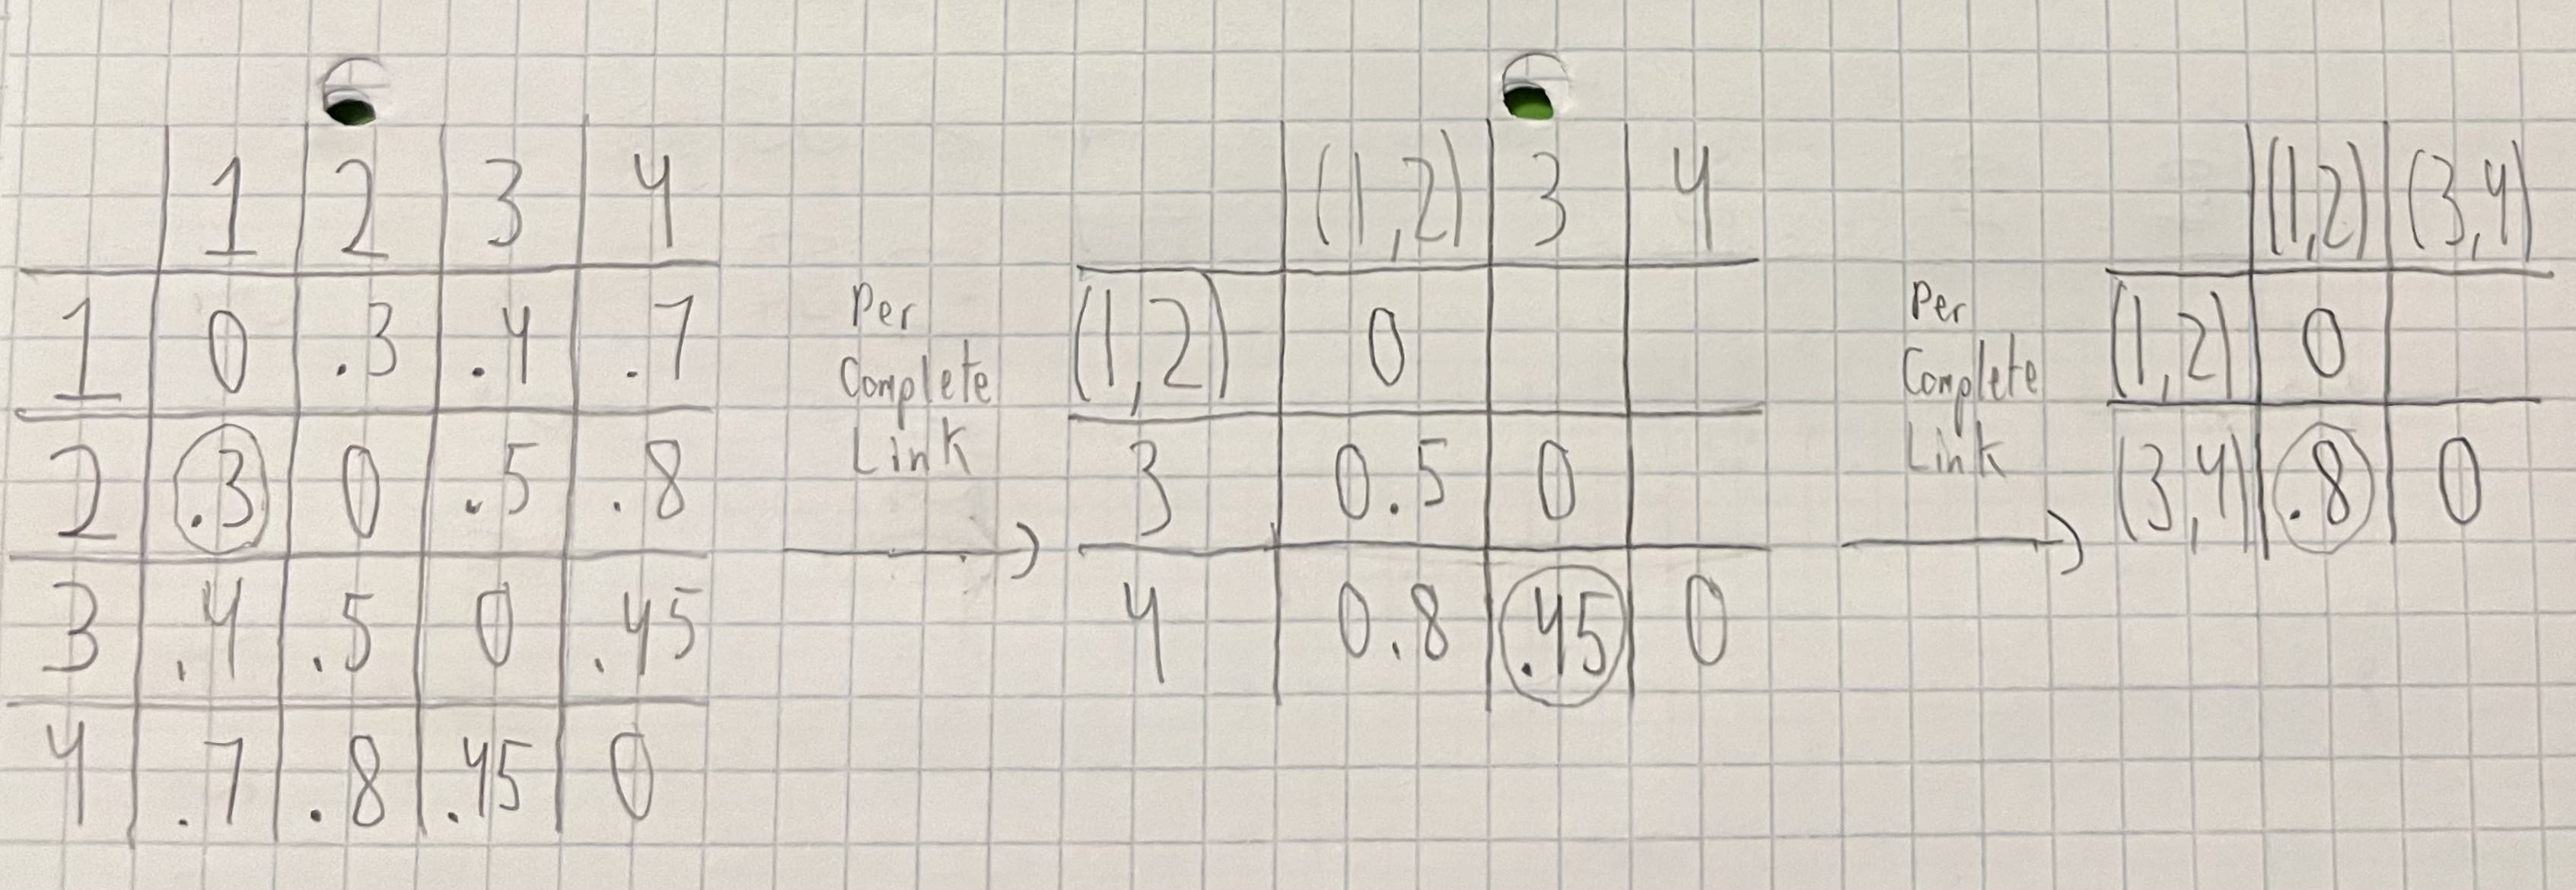


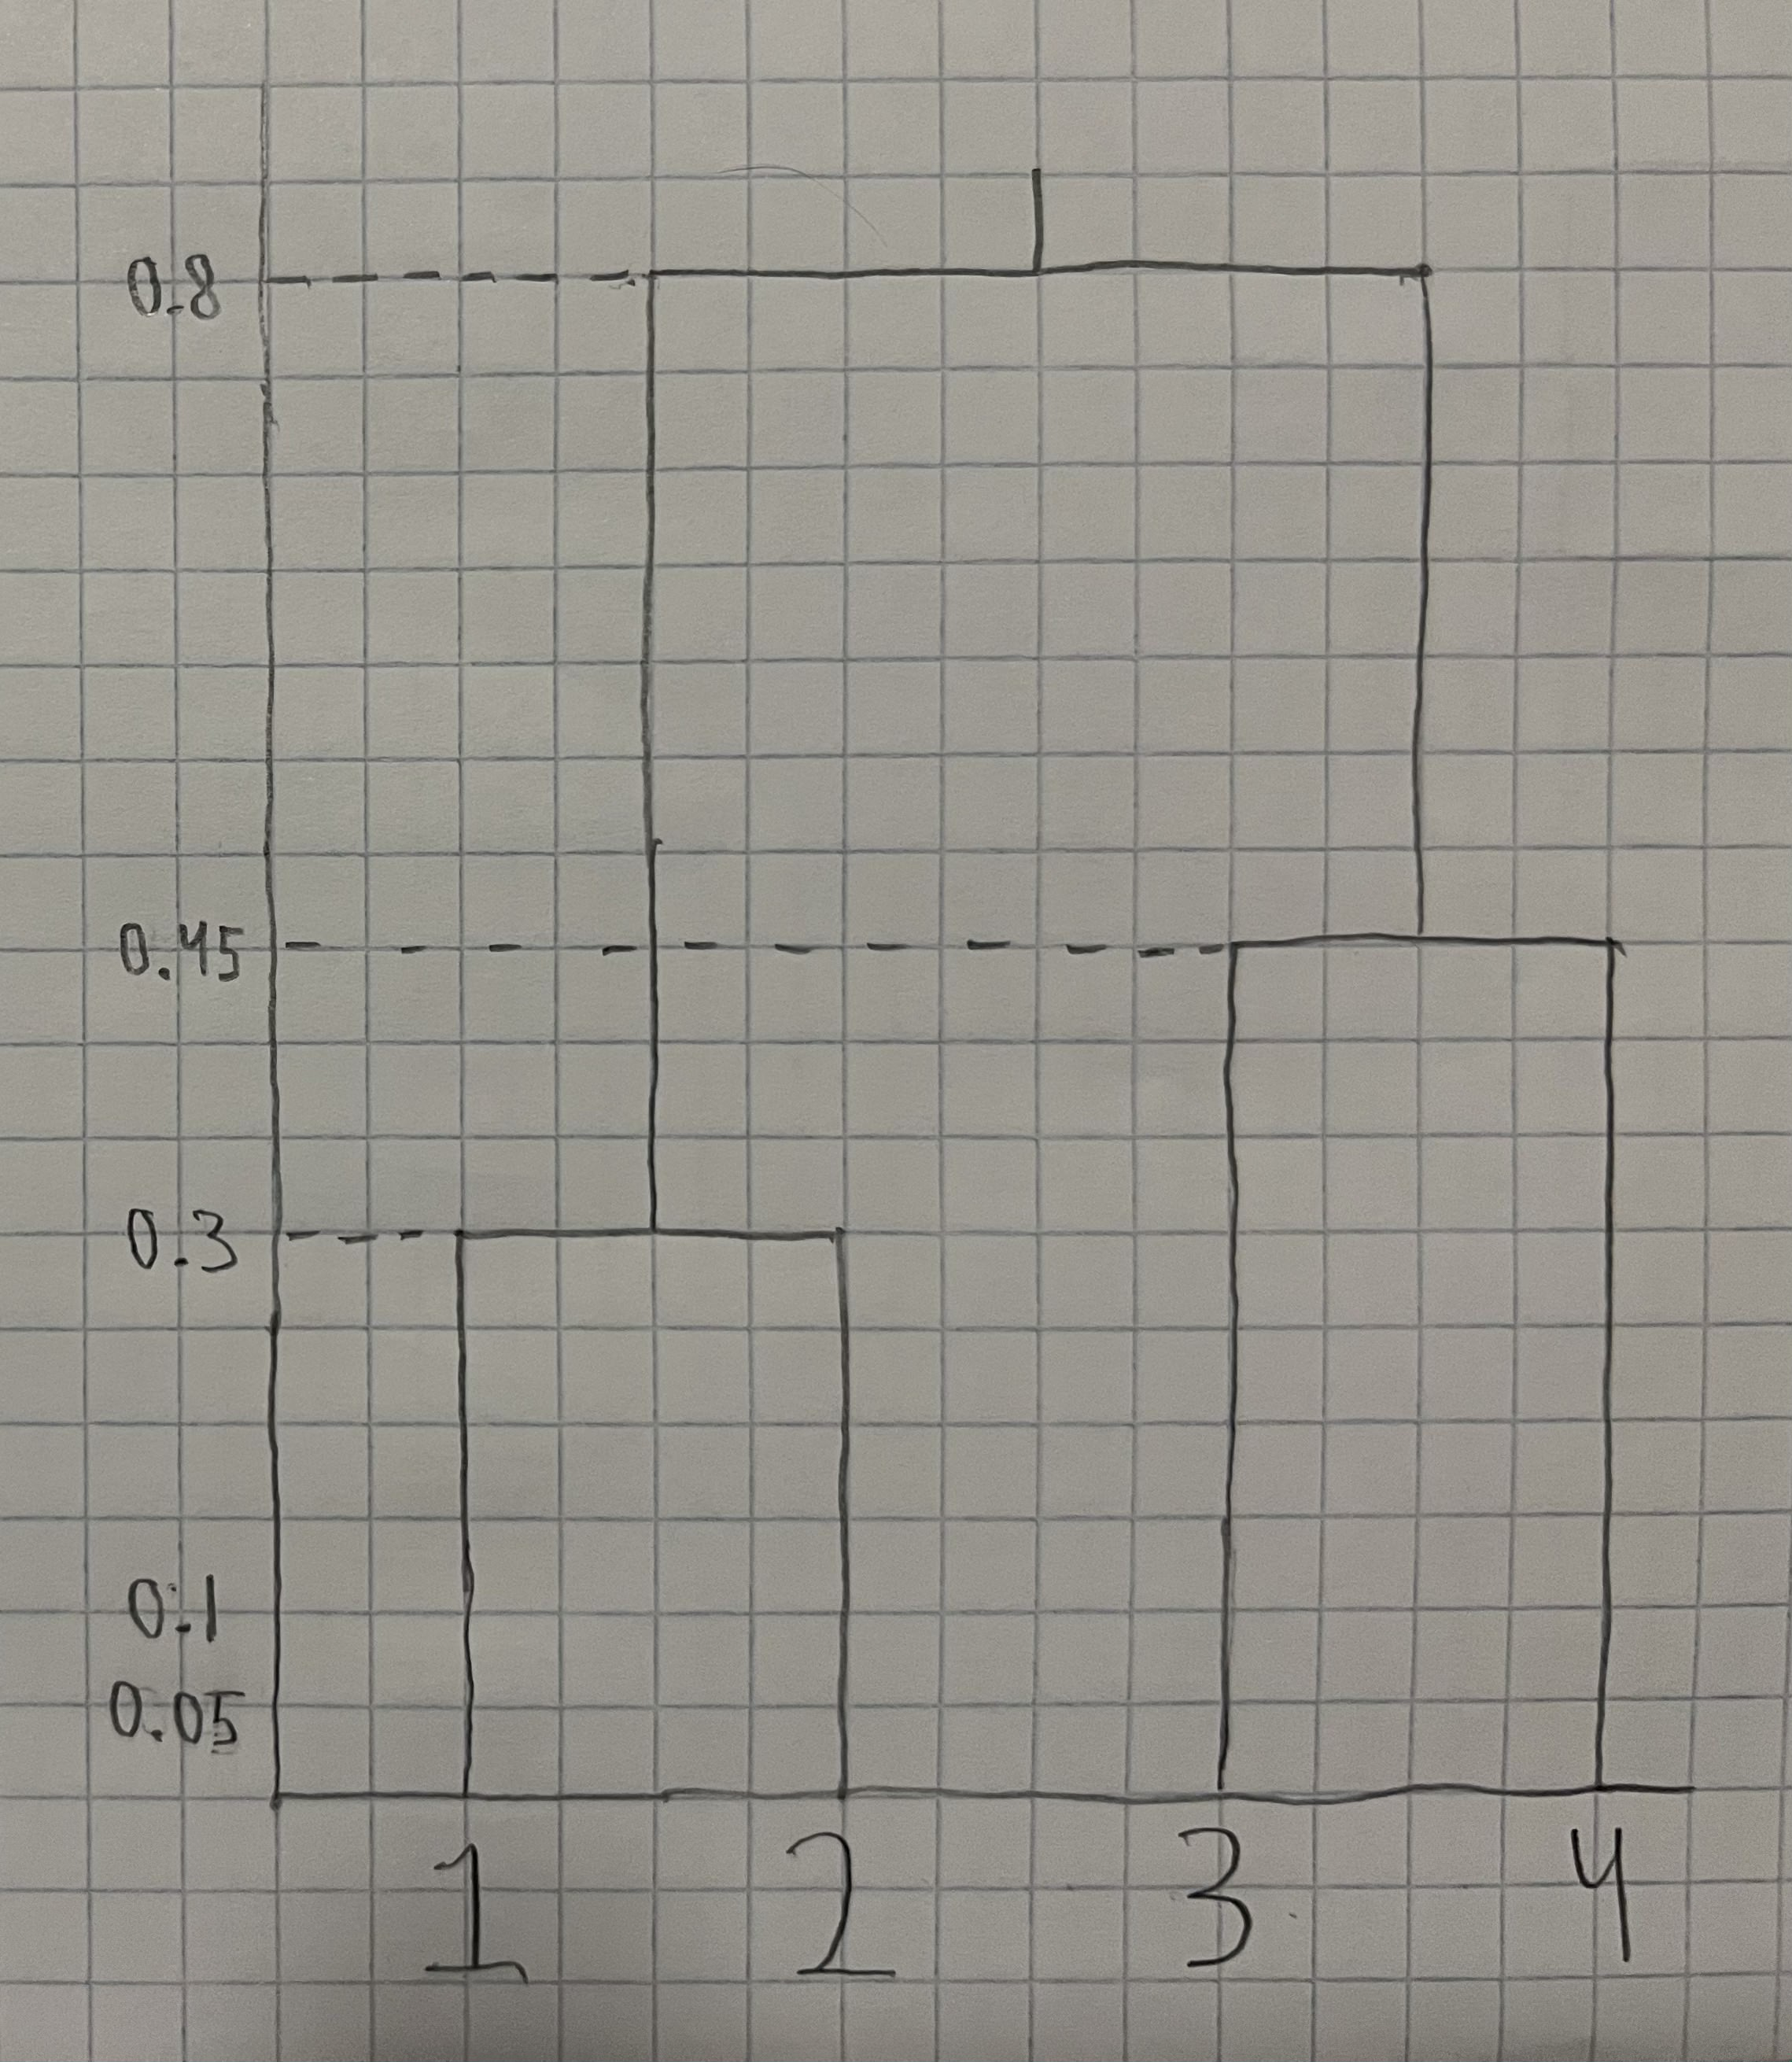

(b) Repeat (a), this time using single linkage clustering.

>Since it's a disimilarity matrix, we pair the obervations (and clusters) in the order of which pair has the smallest value. <br>
>With “single link”, the two most similar (i.e. closest distance) elements in the two nodes/clusters are used to calculate the similarity/distance between the nodes/clusters.

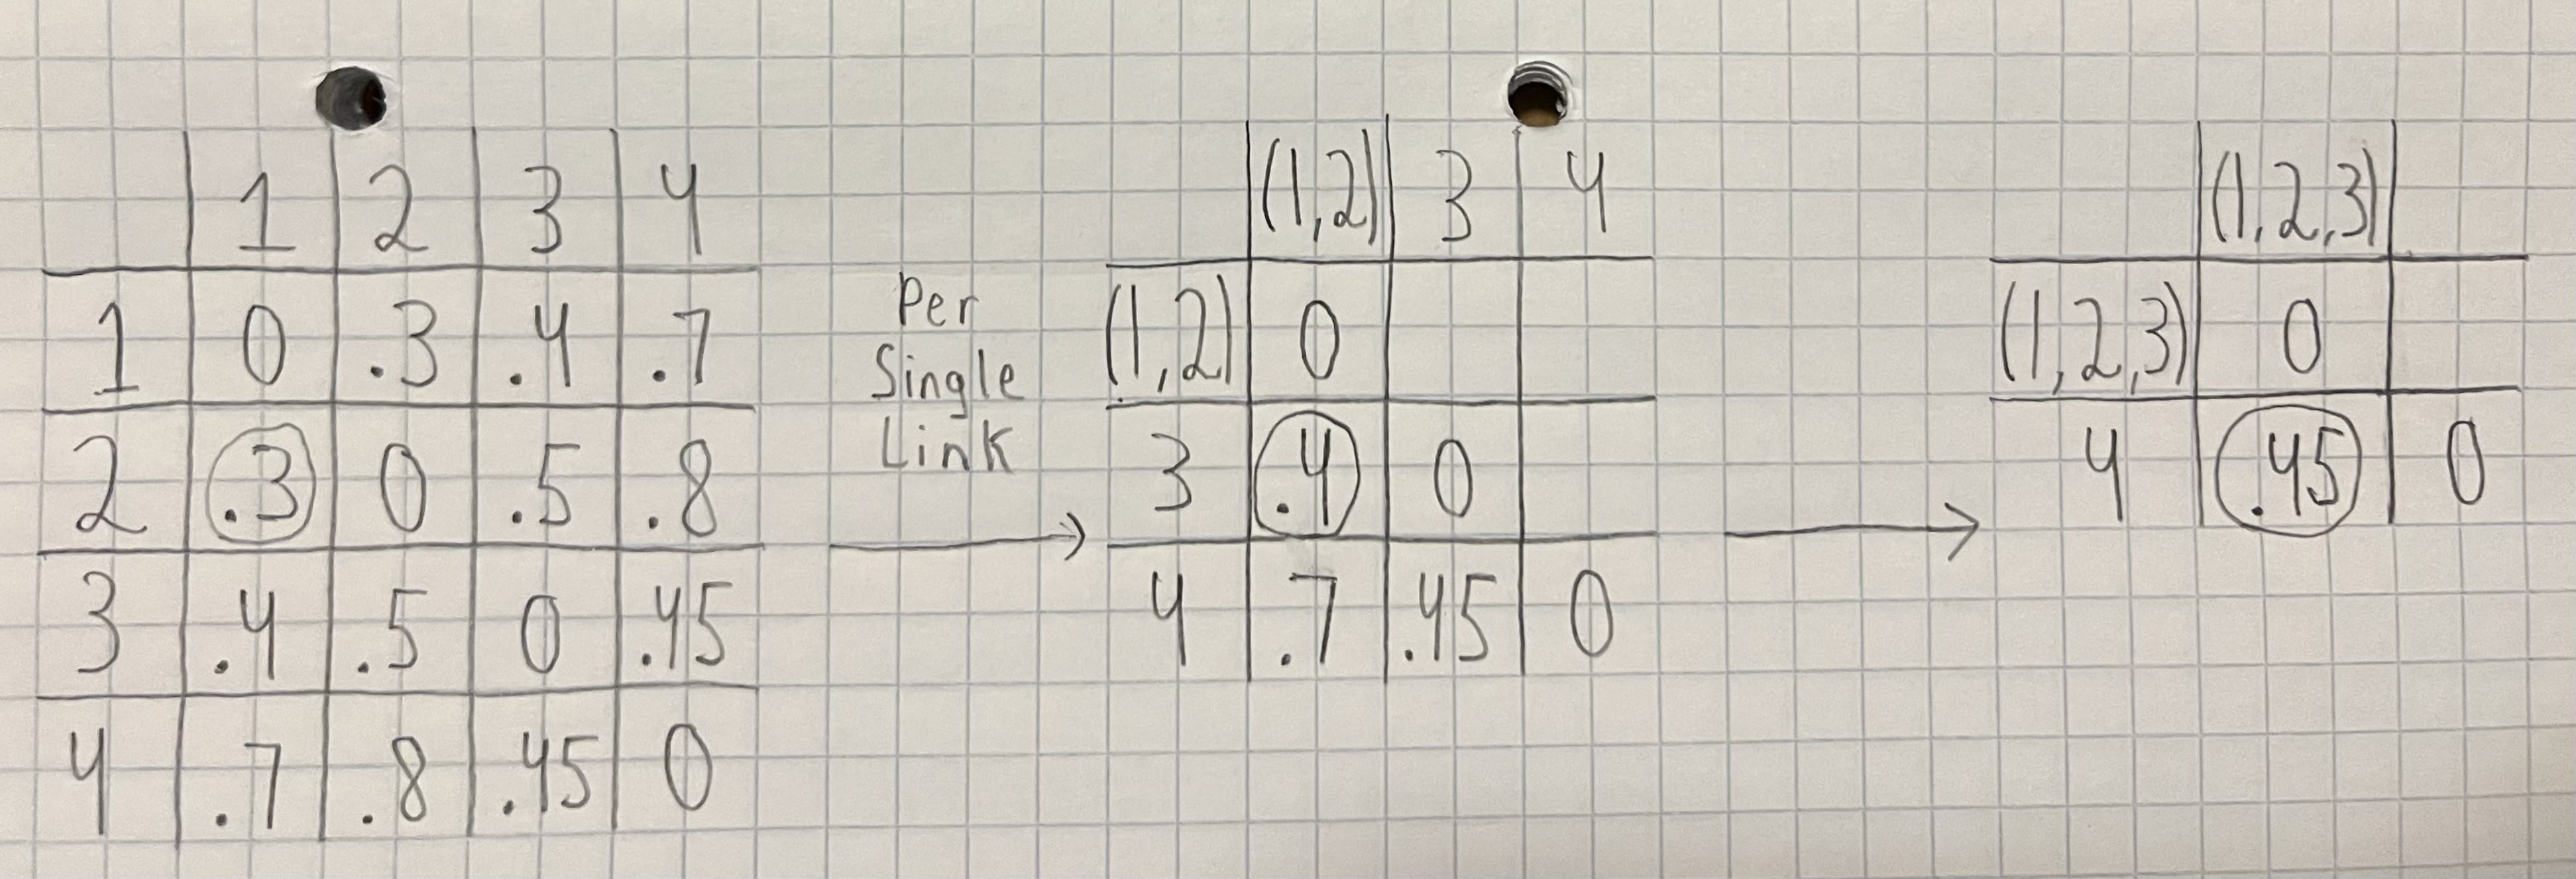

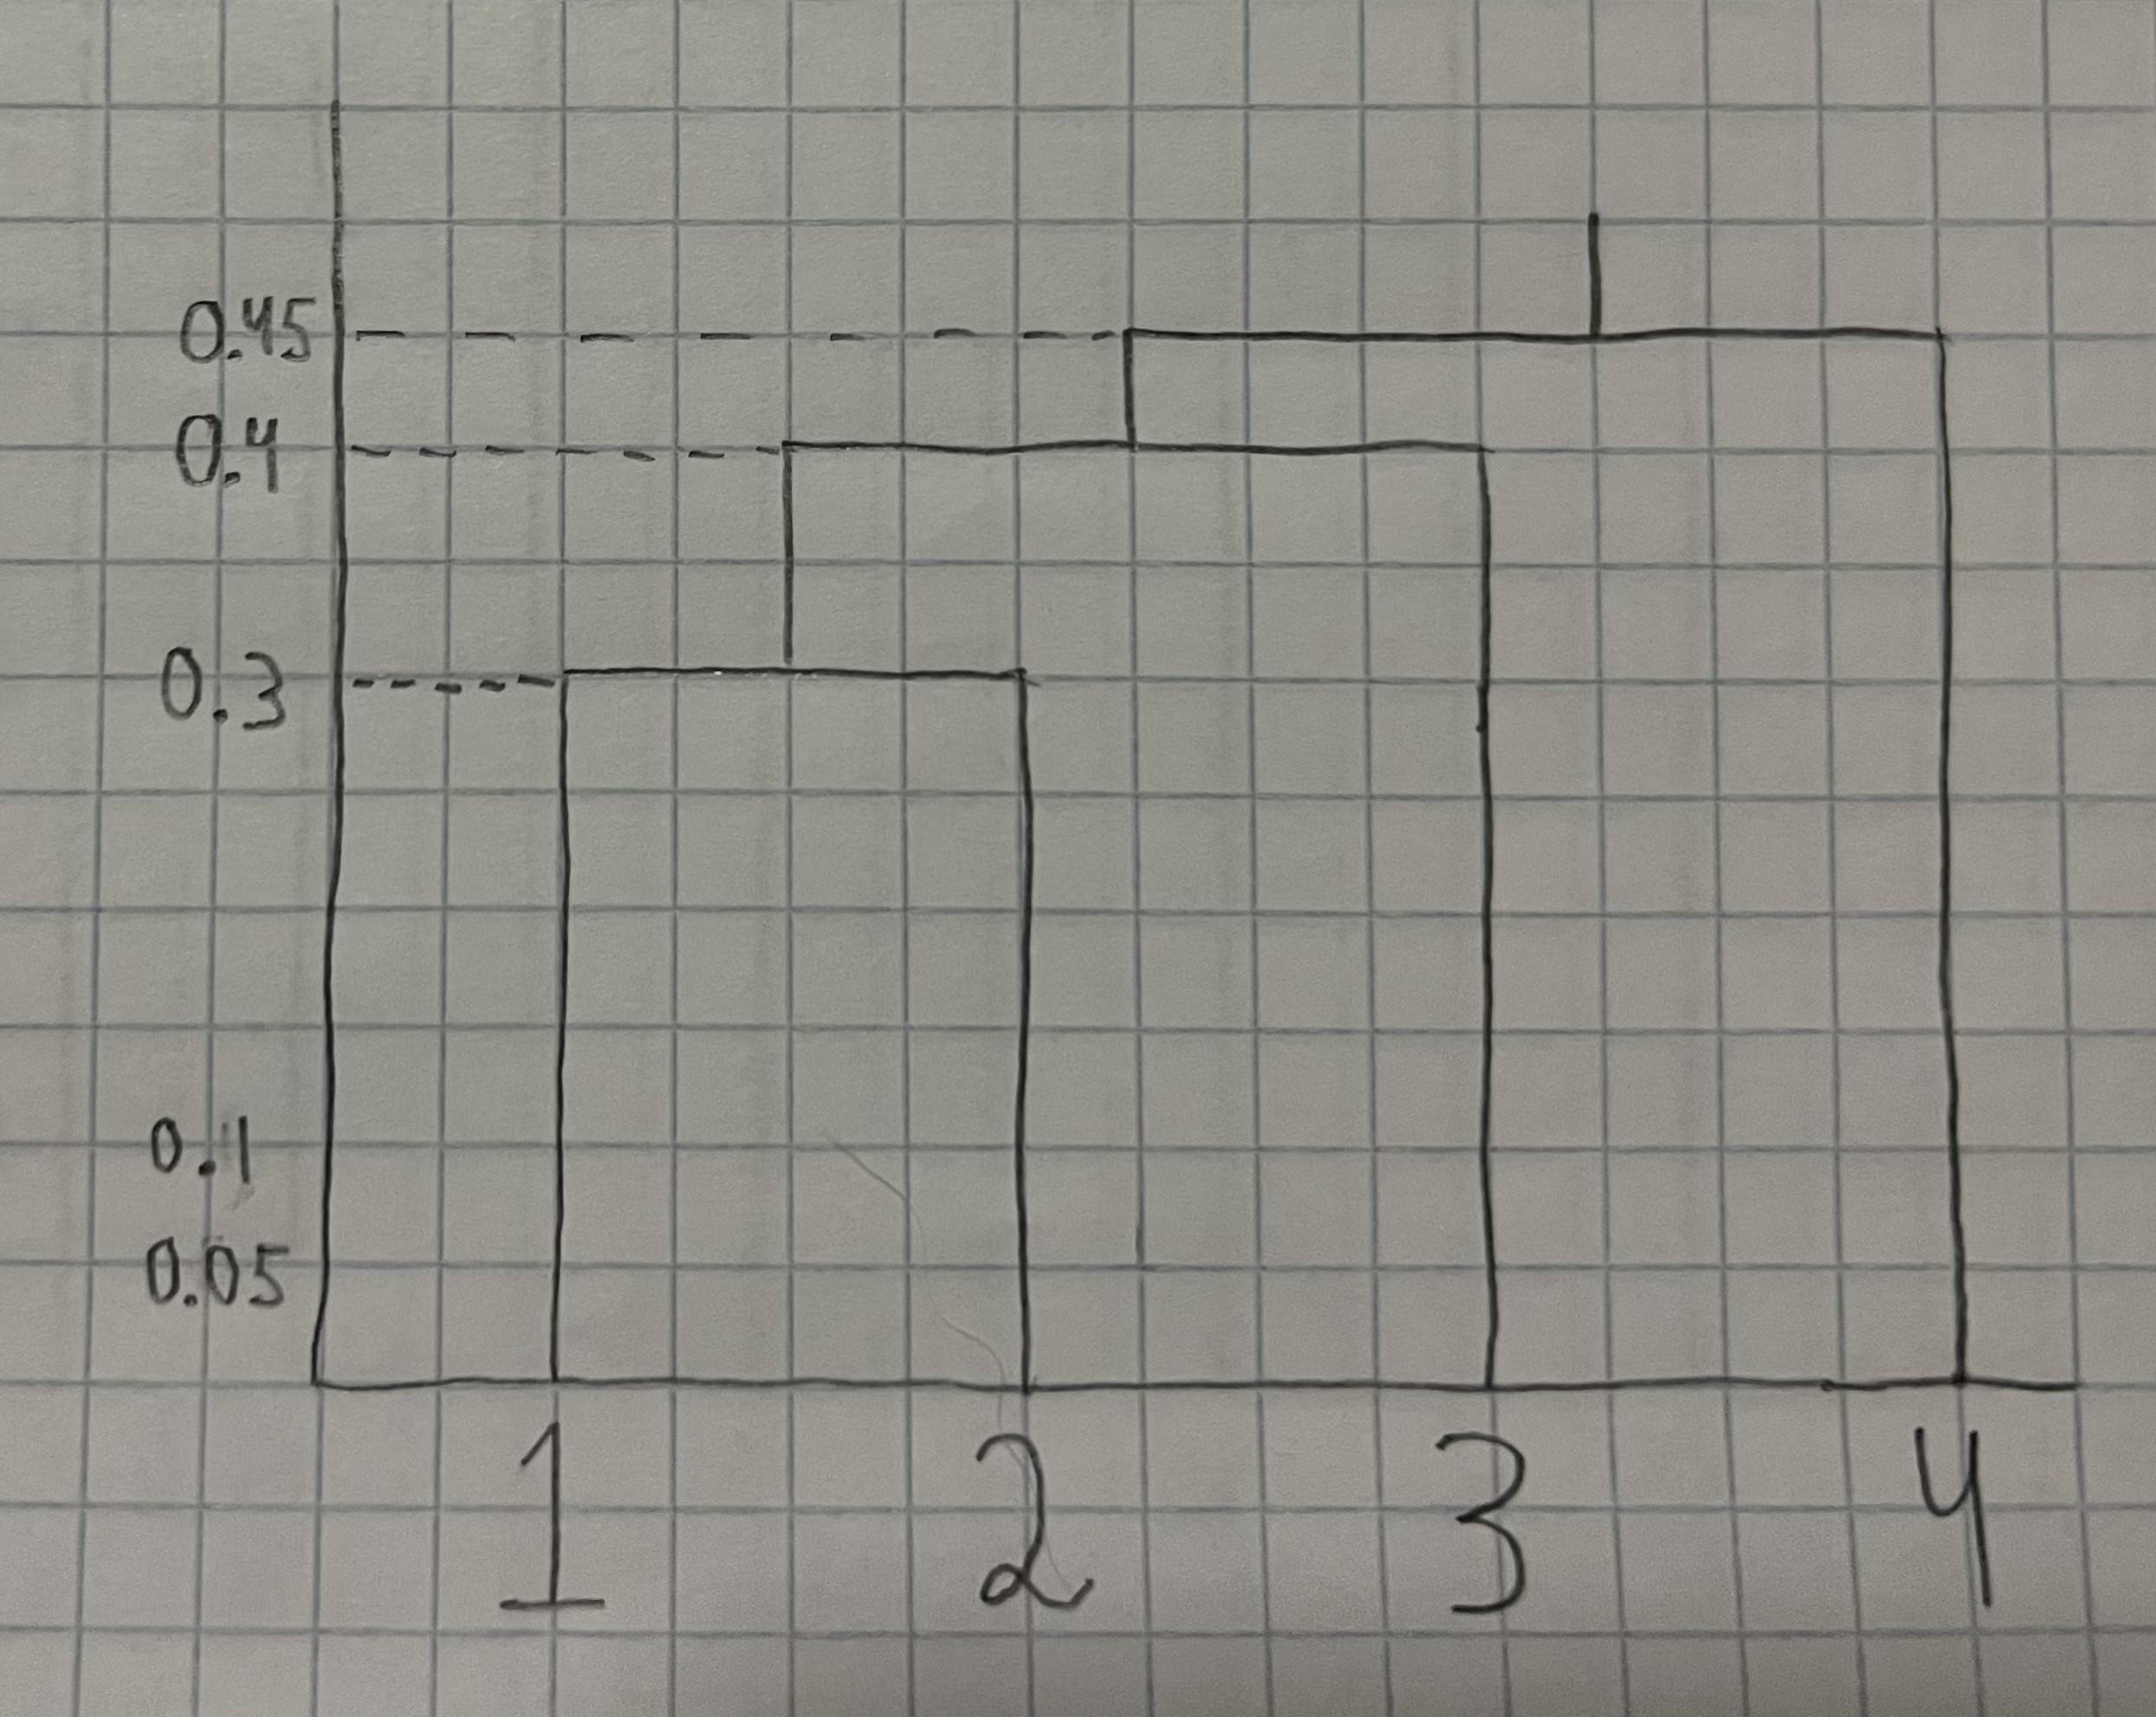

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?


>Cluster 1: {1, 2} <br>
>Cluster 2: {3, 4}

(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?


>Cluster 1: {1, 2, 3} <br>
>Cluster 2: {4}

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

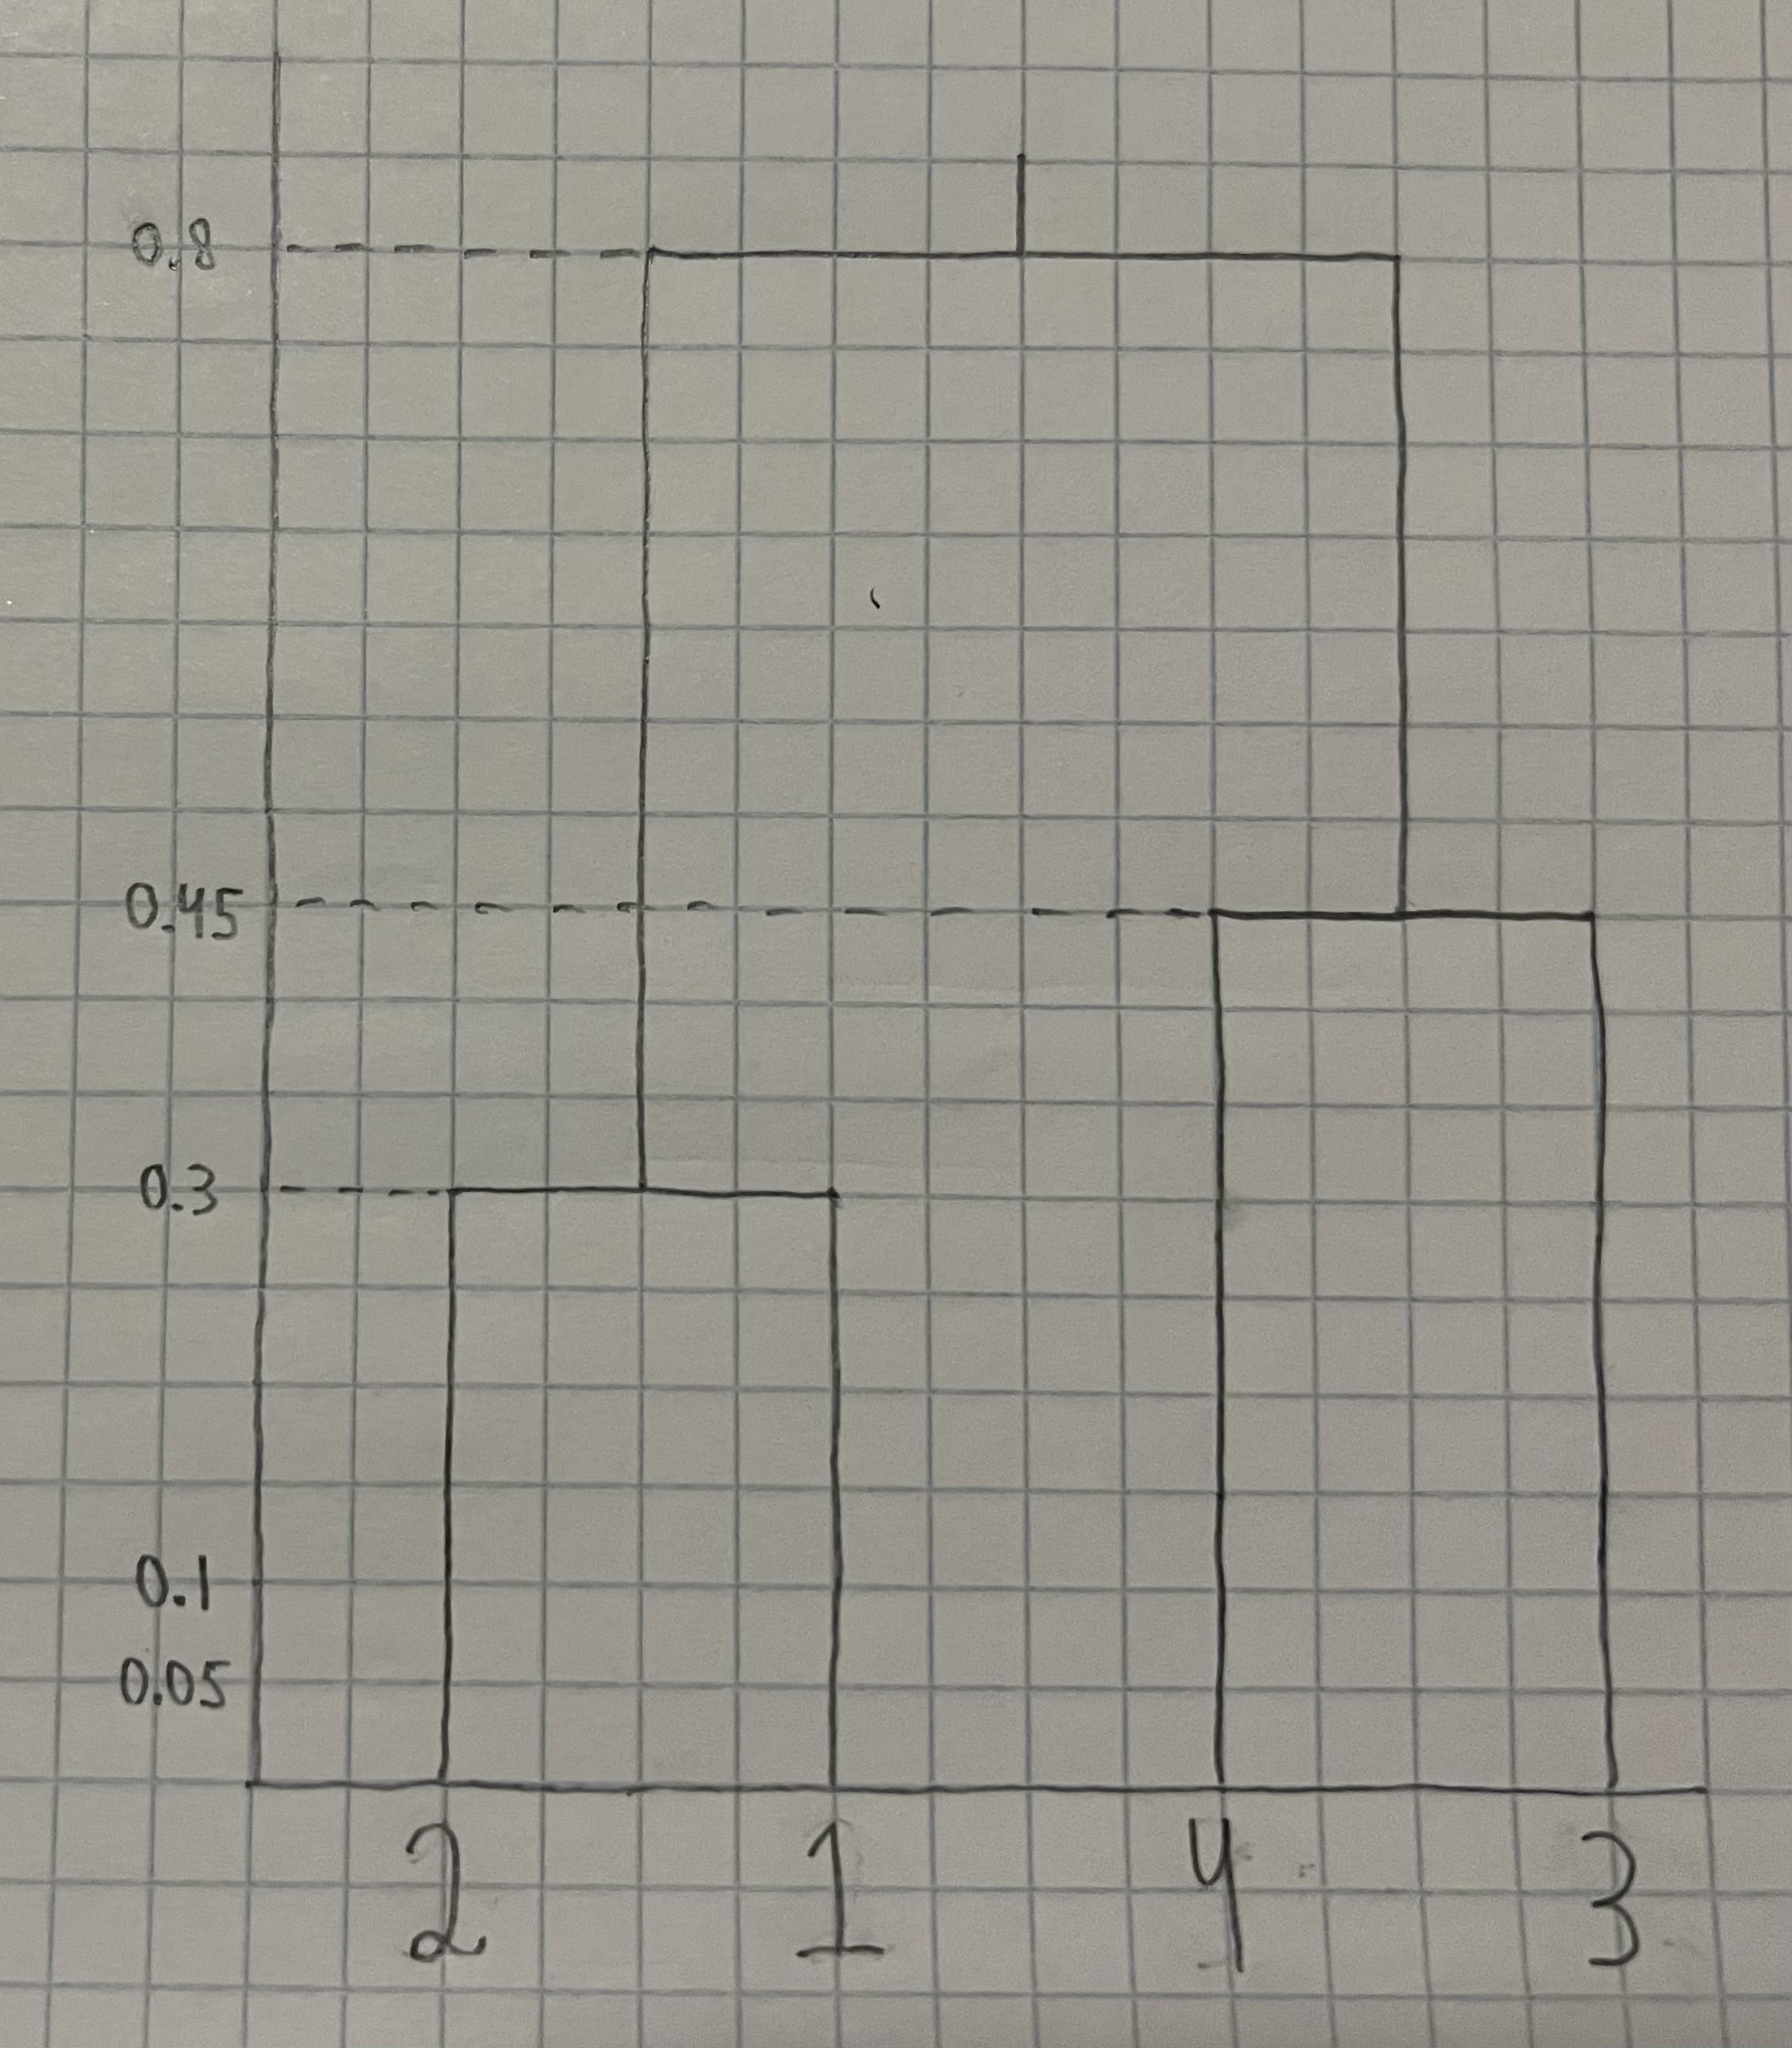